In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df2 = pd.read_parquet(r"C:\Users\liuha\Desktop\Course\IE7275\Project\child-mind-institute-detect-sleep-states\train_series.parquet")

In [3]:
df2

series_id    step                 timestamp     anglez    enmo
0          038441c925bb       0  2018-08-14T15:30:00-0400   2.636700  0.0217
1          038441c925bb       1  2018-08-14T15:30:05-0400   2.636800  0.0215
2          038441c925bb       2  2018-08-14T15:30:10-0400   2.637000  0.0216
3          038441c925bb       3  2018-08-14T15:30:15-0400   2.636800  0.0213
4          038441c925bb       4  2018-08-14T15:30:20-0400   2.636800  0.0215
...                 ...     ...                       ...        ...     ...
127946335  fe90110788d2  592375  2017-09-08T00:14:35-0400 -27.277500  0.0204
127946336  fe90110788d2  592376  2017-09-08T00:14:40-0400 -27.032499  0.0233
127946337  fe90110788d2  592377  2017-09-08T00:14:45-0400 -26.841200  0.0202
127946338  fe90110788d2  592378  2017-09-08T00:14:50-0400 -26.723900  0.0199
127946339  fe90110788d2  592379  2017-09-08T00:14:55-0400 -31.521601  0.0205

[127946340 rows x 5 columns]

In [4]:
data = pd.DataFrame(df2)
Data2 = data[data['series_id'].str.contains('062dbd4c95e6')]
Data2

series_id    step                 timestamp     anglez    enmo
2992140  062dbd4c95e6       0  2018-08-22T12:15:00-0400  10.953900  0.0839
2992141  062dbd4c95e6       1  2018-08-22T12:15:05-0400  16.707899  0.0862
2992142  062dbd4c95e6       2  2018-08-22T12:15:10-0400  14.305600  0.0976
2992143  062dbd4c95e6       3  2018-08-22T12:15:15-0400  23.613001  0.0934
2992144  062dbd4c95e6       4  2018-08-22T12:15:20-0400  14.443400  0.1048
...               ...     ...                       ...        ...     ...
3770815  062dbd4c95e6  778675  2018-10-06T13:44:35-0400 -80.813599  0.0000
3770816  062dbd4c95e6  778676  2018-10-06T13:44:40-0400 -80.813599  0.0000
3770817  062dbd4c95e6  778677  2018-10-06T13:44:45-0400 -80.813599  0.0000
3770818  062dbd4c95e6  778678  2018-10-06T13:44:50-0400 -80.813599  0.0000
3770819  062dbd4c95e6  778679  2018-10-06T13:44:55-0400 -80.813599  0.0000

[778680 rows x 5 columns]

In [5]:
Event = pd.read_csv(r"C:\Users\liuha\Desktop\Course\IE7275\Project\child-mind-institute-detect-sleep-states\train_events.csv")
Event

series_id  night   event      step                 timestamp
0      038441c925bb      1   onset    4992.0  2018-08-14T22:26:00-0400
1      038441c925bb      1  wakeup   10932.0  2018-08-15T06:41:00-0400
2      038441c925bb      2   onset   20244.0  2018-08-15T19:37:00-0400
3      038441c925bb      2  wakeup   27492.0  2018-08-16T05:41:00-0400
4      038441c925bb      3   onset   39996.0  2018-08-16T23:03:00-0400
...             ...    ...     ...       ...                       ...
14503  fe90110788d2     33  wakeup  560604.0  2017-09-06T04:07:00-0400
14504  fe90110788d2     34   onset  574620.0  2017-09-06T23:35:00-0400
14505  fe90110788d2     34  wakeup  581604.0  2017-09-07T09:17:00-0400
14506  fe90110788d2     35   onset       NaN                       NaN
14507  fe90110788d2     35  wakeup       NaN                       NaN

[14508 rows x 5 columns]

In [6]:
ev = Event[Event['series_id'].str.contains('062dbd4c95e6')]
ev

series_id  night   event     step                 timestamp
310  062dbd4c95e6      1   onset   7872.0  2018-08-22T23:11:00-0400
311  062dbd4c95e6      1  wakeup  14484.0  2018-08-23T08:22:00-0400
312  062dbd4c95e6      2   onset      NaN                       NaN
313  062dbd4c95e6      2  wakeup      NaN                       NaN
314  062dbd4c95e6      3   onset      NaN                       NaN
..            ...    ...     ...      ...                       ...
393  062dbd4c95e6     42  wakeup      NaN                       NaN
394  062dbd4c95e6     43   onset      NaN                       NaN
395  062dbd4c95e6     43  wakeup      NaN                       NaN
396  062dbd4c95e6     44   onset      NaN                       NaN
397  062dbd4c95e6     44  wakeup      NaN                       NaN

[88 rows x 5 columns]

In [7]:
ID = '062dbd4c95e6'
df = Data2.dropna(how='any')
df['date_time'] = pd.to_datetime(df['timestamp'], utc=True)
df = df.drop('timestamp', axis=1)
df

series_id    step     anglez    enmo                 date_time
2992140  062dbd4c95e6       0  10.953900  0.0839 2018-08-22 16:15:00+00:00
2992141  062dbd4c95e6       1  16.707899  0.0862 2018-08-22 16:15:05+00:00
2992142  062dbd4c95e6       2  14.305600  0.0976 2018-08-22 16:15:10+00:00
2992143  062dbd4c95e6       3  23.613001  0.0934 2018-08-22 16:15:15+00:00
2992144  062dbd4c95e6       4  14.443400  0.1048 2018-08-22 16:15:20+00:00
...               ...     ...        ...     ...                       ...
3770815  062dbd4c95e6  778675 -80.813599  0.0000 2018-10-06 17:44:35+00:00
3770816  062dbd4c95e6  778676 -80.813599  0.0000 2018-10-06 17:44:40+00:00
3770817  062dbd4c95e6  778677 -80.813599  0.0000 2018-10-06 17:44:45+00:00
3770818  062dbd4c95e6  778678 -80.813599  0.0000 2018-10-06 17:44:50+00:00
3770819  062dbd4c95e6  778679 -80.813599  0.0000 2018-10-06 17:44:55+00:00

[778680 rows x 5 columns]

In [8]:
prediction_beast = [83456, 68812, 8204, 153605, 250991, 239932, 430150, 423436, 181584]
filtered_df = df[df['step'].isin(prediction_beast) ]
  # Adding an 'event' column with each event set to 0.5
filtered_df

series_id    step     anglez    enmo                 date_time
3000344  062dbd4c95e6    8204  42.504002  0.0000 2018-08-23 03:38:40+00:00
3060952  062dbd4c95e6   68812 -34.151199  0.0193 2018-08-26 15:49:20+00:00
3075596  062dbd4c95e6   83456 -17.801500  0.0024 2018-08-27 12:09:40+00:00
3145745  062dbd4c95e6  153605  31.712900  0.0000 2018-08-31 13:35:25+00:00
3173724  062dbd4c95e6  181584 -56.807800  0.0000 2018-09-02 04:27:00+00:00
3232072  062dbd4c95e6  239932  -4.459800  0.0108 2018-09-05 13:29:20+00:00
3243131  062dbd4c95e6  250991 -46.687801  0.0000 2018-09-06 04:50:55+00:00
3415576  062dbd4c95e6  423436  57.987999  0.0000 2018-09-16 04:21:20+00:00
3422290  062dbd4c95e6  430150  37.540600  0.0066 2018-09-16 13:40:50+00:00

In [9]:
prediction_border_points=[  1474,   5659,   5679,   6626,   9799,   9810,   9826,  12135,
        12143,  13148,  14483,  60732,  62416,  62419,  62423,  69994,
        70370,  70373,  73030,  73033,  76363,  76366,  76376,  76387,
        83158,  83164,  87603,  90110,  91988,  92622,  98916,  98931,
       101861, 101869, 146520, 148120, 148154, 148163, 148688, 148691,
       148815, 152821, 152824, 157624, 158764, 158769, 163584, 165437,
       165441, 172030, 173203, 173219, 173256, 173259, 178074, 187631,
       187636, 187638, 187642, 237520, 237522, 237525, 237548, 237556,
       239878, 239904, 240191, 250396, 252927, 252929, 335933, 335937,
       413270, 413281, 413828, 413830, 413835, 413836, 414486, 416122,
       416136, 416137, 416141, 416782, 416800, 423648, 427684, 427689,
       429373, 434543, 434681, 434683, 443046, 443050, 447467, 447492,
       449849, 449899, 452277, 457908, 457926, 457952, 463166, 463168,
       463177]
filtered_df2 = df[df['step'].isin(prediction_border_points) ]
  # Adding an 'event' column with each event set to 0.5
filtered_df2

series_id    step     anglez    enmo                 date_time
2993614  062dbd4c95e6    1474  23.927000  0.3116 2018-08-22 18:17:50+00:00
2997799  062dbd4c95e6    5659 -38.935600  0.0020 2018-08-23 00:06:35+00:00
2997819  062dbd4c95e6    5679  51.209202  0.0051 2018-08-23 00:08:15+00:00
2998766  062dbd4c95e6    6626 -14.362100  0.0369 2018-08-23 01:27:10+00:00
3001939  062dbd4c95e6    9799 -48.666801  0.0000 2018-08-23 05:51:35+00:00
...               ...     ...        ...     ...                       ...
3450066  062dbd4c95e6  457926 -28.260300  0.0000 2018-09-18 04:15:30+00:00
3450092  062dbd4c95e6  457952 -28.260300  0.0000 2018-09-18 04:17:40+00:00
3455306  062dbd4c95e6  463166 -40.506302  0.0624 2018-09-18 11:32:10+00:00
3455308  062dbd4c95e6  463168 -67.036499  0.0005 2018-09-18 11:32:20+00:00
3455317  062dbd4c95e6  463177 -66.961601  0.0000 2018-09-18 11:33:05+00:00

[105 rows x 5 columns]

In [10]:
#ev = event[event['series_id']==ID].dropna(how='any')
ev = ev.dropna(how='any')
ev['date_time'] = pd.to_datetime(ev['timestamp'], utc=True)
ev = ev.drop('timestamp', axis=1)
ev

series_id  night   event      step                 date_time
310  062dbd4c95e6      1   onset    7872.0 2018-08-23 03:11:00+00:00
311  062dbd4c95e6      1  wakeup   14484.0 2018-08-23 12:22:00+00:00
316  062dbd4c95e6      4   onset   60720.0 2018-08-26 04:35:00+00:00
317  062dbd4c95e6      4  wakeup   68400.0 2018-08-26 15:15:00+00:00
318  062dbd4c95e6      5   onset   77304.0 2018-08-27 03:37:00+00:00
319  062dbd4c95e6      5  wakeup   83292.0 2018-08-27 11:56:00+00:00
320  062dbd4c95e6      6   onset   94716.0 2018-08-28 03:48:00+00:00
321  062dbd4c95e6      6  wakeup  101976.0 2018-08-28 13:53:00+00:00
326  062dbd4c95e6      9   onset  146520.0 2018-08-31 03:45:00+00:00
327  062dbd4c95e6      9  wakeup  153576.0 2018-08-31 13:33:00+00:00
328  062dbd4c95e6     10   onset  163500.0 2018-09-01 03:20:00+00:00
329  062dbd4c95e6     10  wakeup  170244.0 2018-09-01 12:42:00+00:00
330  062dbd4c95e6     11   onset  181452.0 2018-09-02 04:16:00+00:00
331  062dbd4c95e6     11  wakeup  187644.0 2018-09-02 12:52:00+00:00
336  062dbd4c95e6     14   onset  230892.0 2018-09-05 00:56:00+00:00
337  062dbd4c95e6     14  wakeup  239532.0 2018-09-05 12:56:00+00:00
338  062dbd4c95e6     15   onset  250848.0 2018-09-06 04:39:00+00:00
339  062dbd4c95e6     15  wakeup  256224.0 2018-09-06 12:07:00+00:00
348  062dbd4c95e6     20   onset  335916.0 2018-09-11 02:48:00+00:00
349  062dbd4c95e6     20  wakeup  343164.0 2018-09-11 12:52:00+00:00
356  062dbd4c95e6     24   onset  405540.0 2018-09-15 03:30:00+00:00
357  062dbd4c95e6     24  wakeup  412416.0 2018-09-15 13:03:00+00:00
358  062dbd4c95e6     25   onset  423240.0 2018-09-16 04:05:00+00:00
359  062dbd4c95e6     25  wakeup  429924.0 2018-09-16 13:22:00+00:00
360  062dbd4c95e6     26   onset  439812.0 2018-09-17 03:06:00+00:00
361  062dbd4c95e6     26  wakeup  447384.0 2018-09-17 13:37:00+00:00
362  062dbd4c95e6     27   onset  457284.0 2018-09-18 03:22:00+00:00
363  062dbd4c95e6     27  wakeup  464244.0 2018-09-18 13:02:00+00:00

In [11]:
df2 = pd.merge(df, ev, on='date_time', how='outer')
#print(df2.copy().dropna(how='any'))   ### CHECK ###
df2 = df2.drop(['series_id_x','series_id_y','step_x','step_y'], axis=1)
df2['event'] = df2['event'].fillna(0)
df2['night'][0] = 1
df2['night'] = df2['night'].interpolate()
df2['night'] = round(df2['night'])
df2.loc[df2['event']=='onset','event'] = -1
df2.loc[df2['event']=='wakeup','event'] = 1
df2

anglez    enmo                 date_time  night event
0       10.953900  0.0839 2018-08-22 16:15:00+00:00    1.0     0
1       16.707899  0.0862 2018-08-22 16:15:05+00:00    1.0     0
2       14.305600  0.0976 2018-08-22 16:15:10+00:00    1.0     0
3       23.613001  0.0934 2018-08-22 16:15:15+00:00    1.0     0
4       14.443400  0.1048 2018-08-22 16:15:20+00:00    1.0     0
...           ...     ...                       ...    ...   ...
778675 -80.813599  0.0000 2018-10-06 17:44:35+00:00   27.0     0
778676 -80.813599  0.0000 2018-10-06 17:44:40+00:00   27.0     0
778677 -80.813599  0.0000 2018-10-06 17:44:45+00:00   27.0     0
778678 -80.813599  0.0000 2018-10-06 17:44:50+00:00   27.0     0
778679 -80.813599  0.0000 2018-10-06 17:44:55+00:00   27.0     0

[778680 rows x 5 columns]

In [12]:


# First, ensure both 'date_time' columns are in the same datetime format
filtered_df['date_time'] = pd.to_datetime(filtered_df['date_time'])
df2['date_time'] = pd.to_datetime(df2['date_time'])

# Mapping 'night' from df2 to 'filtered_df' based on the closest 'date_time'
filtered_df['night'] = filtered_df['date_time'].apply(
    lambda dt: df2.iloc[(df2['date_time'] - dt).abs().argmin()]['night']
)

filtered_df


series_id    step     anglez    enmo                 date_time  \
3000344  062dbd4c95e6    8204  42.504002  0.0000 2018-08-23 03:38:40+00:00   
3060952  062dbd4c95e6   68812 -34.151199  0.0193 2018-08-26 15:49:20+00:00   
3075596  062dbd4c95e6   83456 -17.801500  0.0024 2018-08-27 12:09:40+00:00   
3145745  062dbd4c95e6  153605  31.712900  0.0000 2018-08-31 13:35:25+00:00   
3173724  062dbd4c95e6  181584 -56.807800  0.0000 2018-09-02 04:27:00+00:00   
3232072  062dbd4c95e6  239932  -4.459800  0.0108 2018-09-05 13:29:20+00:00   
3243131  062dbd4c95e6  250991 -46.687801  0.0000 2018-09-06 04:50:55+00:00   
3415576  062dbd4c95e6  423436  57.987999  0.0000 2018-09-16 04:21:20+00:00   
3422290  062dbd4c95e6  430150  37.540600  0.0066 2018-09-16 13:40:50+00:00   

         night  
3000344    1.0  
3060952    4.0  
3075596    5.0  
3145745    9.0  
3173724   11.0  
3232072   14.0  
3243131   15.0  
3415576   25.0  
3422290   25.0

In [13]:
filtered_df2['date_time'] = pd.to_datetime(filtered_df2['date_time'])
df2['date_time'] = pd.to_datetime(df2['date_time'])

# Mapping 'night' from df2 to 'filtered_df' based on the closest 'date_time'
filtered_df2['night'] = filtered_df2['date_time'].apply(
    lambda dt: df2.iloc[(df2['date_time'] - dt).abs().argmin()]['night']
)

filtered_df2


series_id    step     anglez    enmo                 date_time  \
2993614  062dbd4c95e6    1474  23.927000  0.3116 2018-08-22 18:17:50+00:00   
2997799  062dbd4c95e6    5659 -38.935600  0.0020 2018-08-23 00:06:35+00:00   
2997819  062dbd4c95e6    5679  51.209202  0.0051 2018-08-23 00:08:15+00:00   
2998766  062dbd4c95e6    6626 -14.362100  0.0369 2018-08-23 01:27:10+00:00   
3001939  062dbd4c95e6    9799 -48.666801  0.0000 2018-08-23 05:51:35+00:00   
...               ...     ...        ...     ...                       ...   
3450066  062dbd4c95e6  457926 -28.260300  0.0000 2018-09-18 04:15:30+00:00   
3450092  062dbd4c95e6  457952 -28.260300  0.0000 2018-09-18 04:17:40+00:00   
3455306  062dbd4c95e6  463166 -40.506302  0.0624 2018-09-18 11:32:10+00:00   
3455308  062dbd4c95e6  463168 -67.036499  0.0005 2018-09-18 11:32:20+00:00   
3455317  062dbd4c95e6  463177 -66.961601  0.0000 2018-09-18 11:33:05+00:00   

         night  
2993614    1.0  
2997799    1.0  
2997819    1.0  
2998766    1.0  
3001939    1.0  
...        ...  
3450066   27.0  
3450092   27.0  
3455306   27.0  
3455308   27.0  
3455317   27.0  

[105 rows x 6 columns]

In [14]:
df2

anglez    enmo                 date_time  night event
0       10.953900  0.0839 2018-08-22 16:15:00+00:00    1.0     0
1       16.707899  0.0862 2018-08-22 16:15:05+00:00    1.0     0
2       14.305600  0.0976 2018-08-22 16:15:10+00:00    1.0     0
3       23.613001  0.0934 2018-08-22 16:15:15+00:00    1.0     0
4       14.443400  0.1048 2018-08-22 16:15:20+00:00    1.0     0
...           ...     ...                       ...    ...   ...
778675 -80.813599  0.0000 2018-10-06 17:44:35+00:00   27.0     0
778676 -80.813599  0.0000 2018-10-06 17:44:40+00:00   27.0     0
778677 -80.813599  0.0000 2018-10-06 17:44:45+00:00   27.0     0
778678 -80.813599  0.0000 2018-10-06 17:44:50+00:00   27.0     0
778679 -80.813599  0.0000 2018-10-06 17:44:55+00:00   27.0     0

[778680 rows x 5 columns]

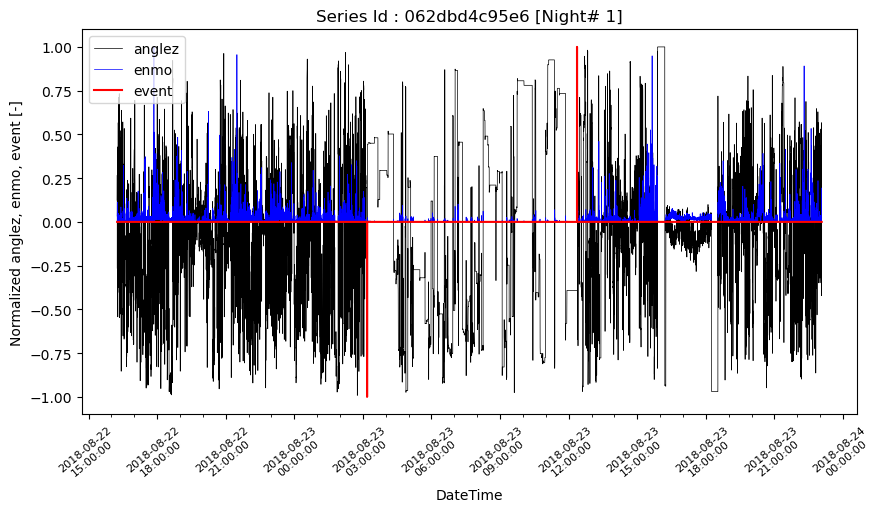

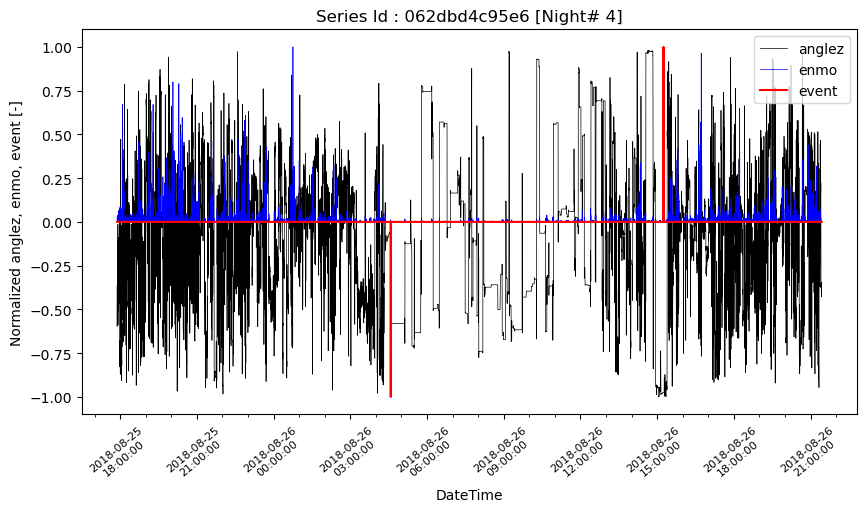

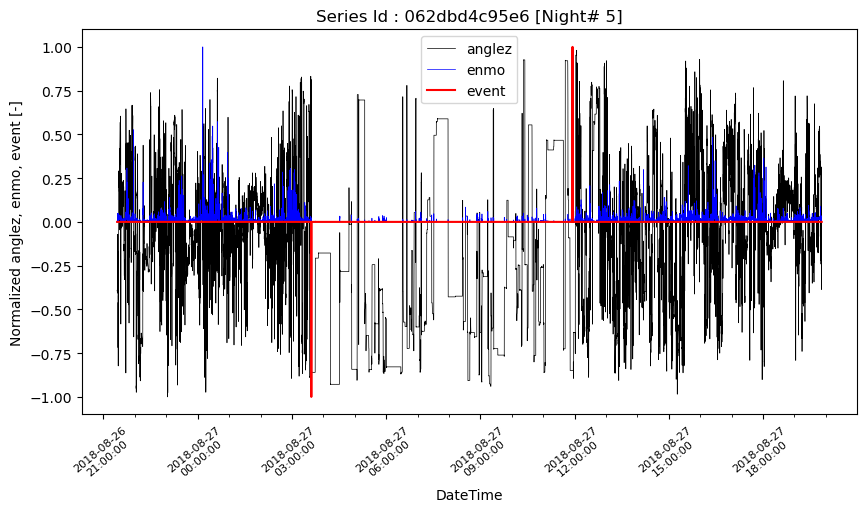

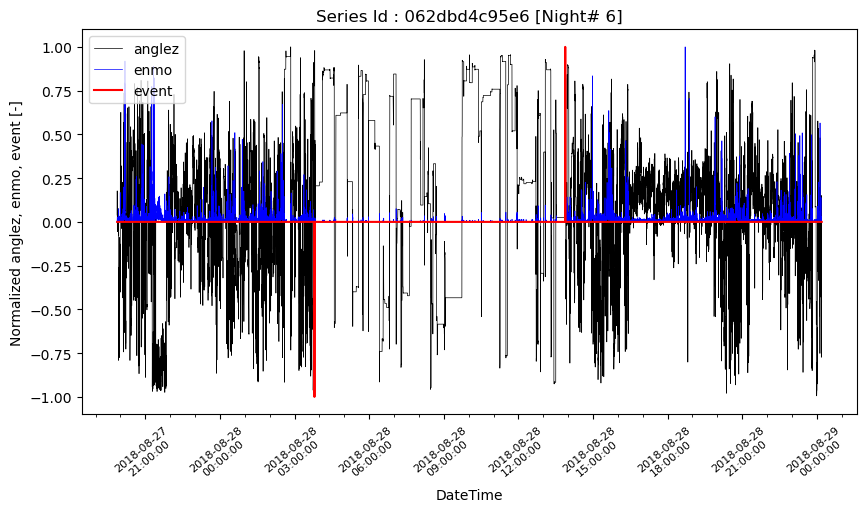

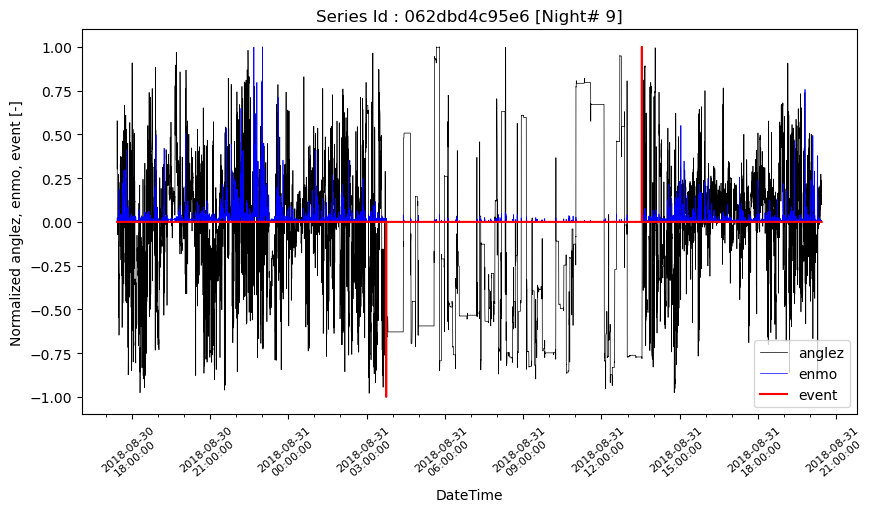

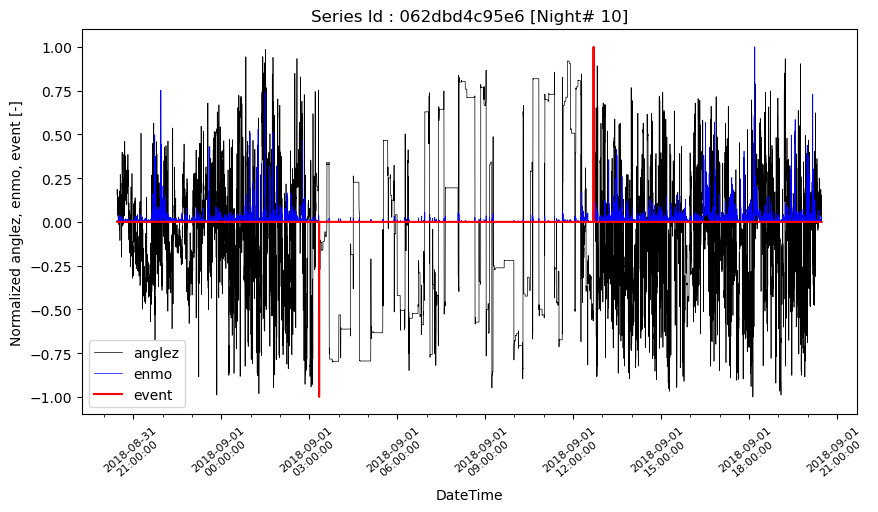

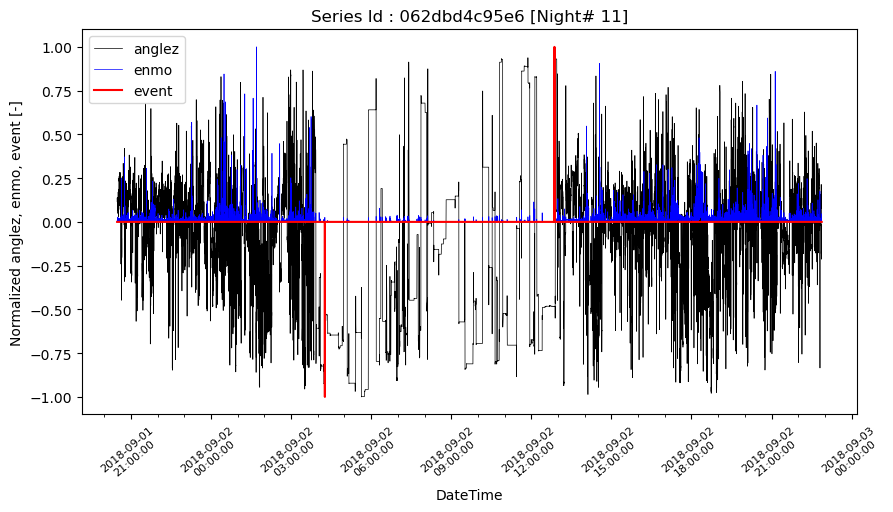

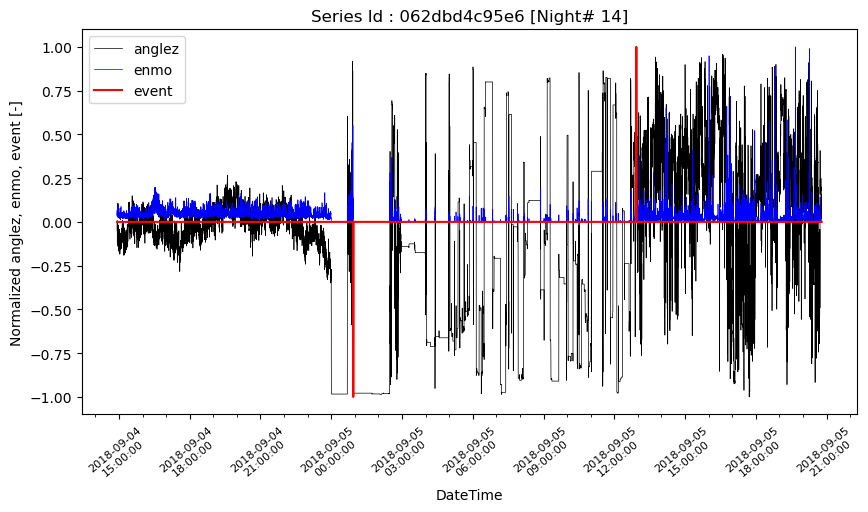

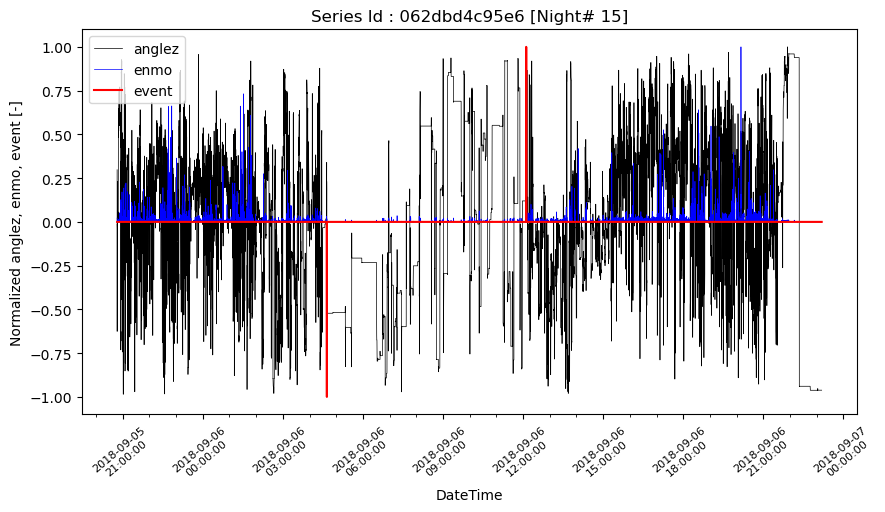

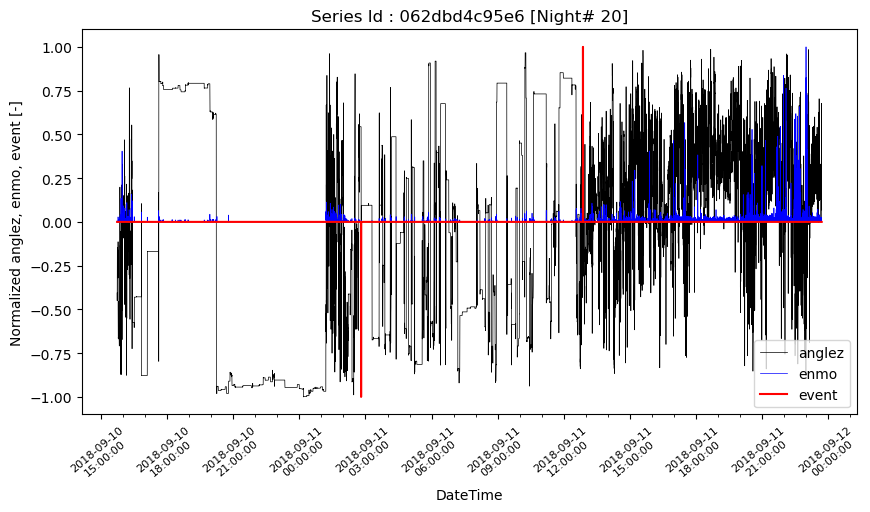

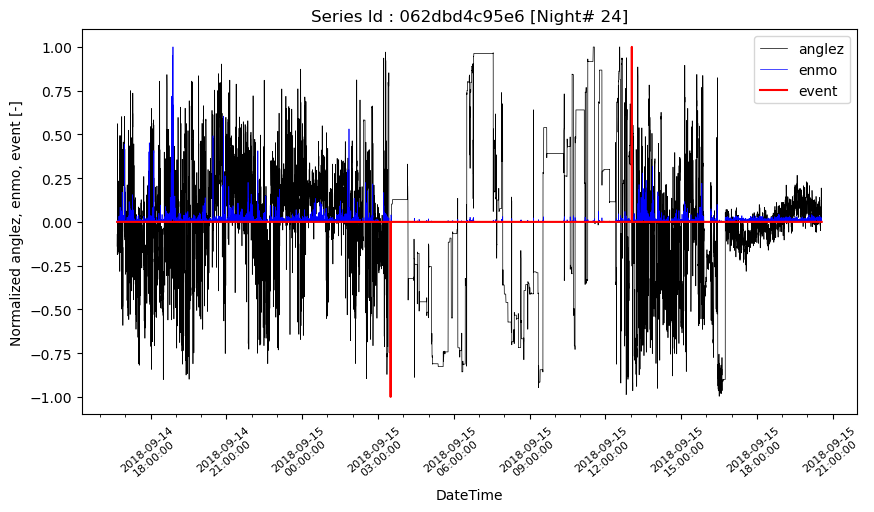

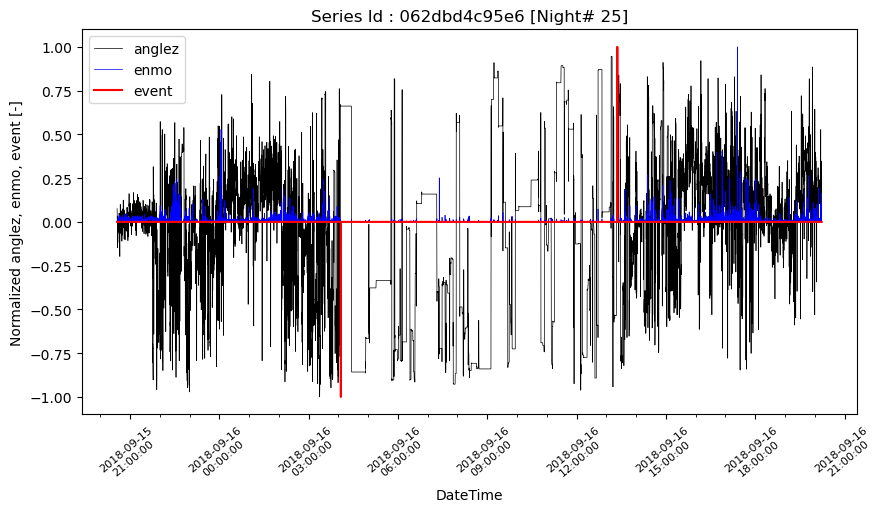

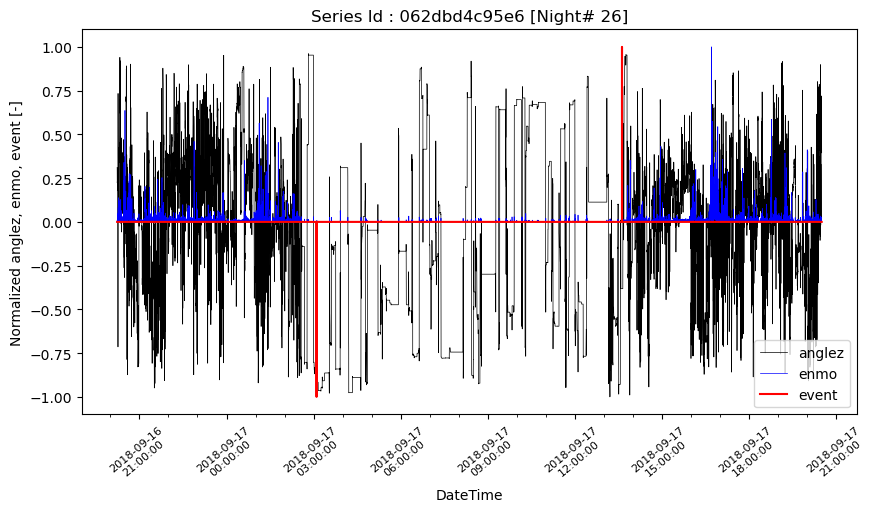

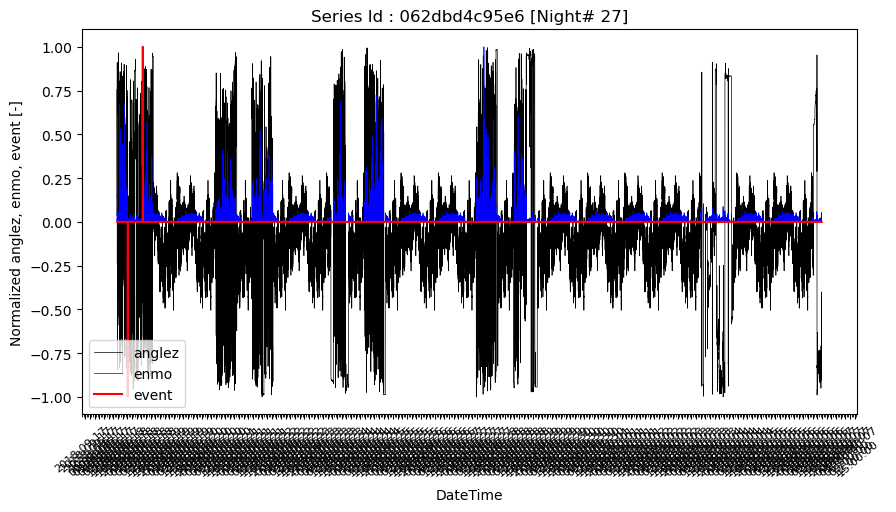

In [15]:
for i in set(df2['night']):
    df22 = df2[df2['night']==i]
    df22['anglez'] = df22['anglez'] / max(abs(max(df22['anglez'])),abs(min(df22['anglez'])))
    df22['enmo'] = df22['enmo'] / max(abs(max(df22['enmo'])),abs(min(df22['enmo'])))
    df22['event'] = df22['event'] / max(abs(max(df22['event'])),abs(min(df22['event'])),1e-10)
    if df22['event'].max() == 1:
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot()
        ax.plot(df22['date_time'], df22['anglez'], color='k', linewidth=0.5, label="anglez")
        ax.plot(df22['date_time'], df22['enmo'], color='b', linewidth=0.5, label="enmo")
        ax.plot(df22['date_time'], df22['event'], color='r', label="event")
        ax.legend()
        ax.set_title('Series Id : '+ID+' [Night# '+str(int(i))+']')
        ax.set_xlabel('DateTime')
        ax.set_ylabel('Normalized anglez, enmo, event [-]')
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
        ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S"))
        labels = ax.get_xticklabels()
        plt.setp(labels, rotation=40, fontsize=8)
        plt.show()

In [16]:
 filtered_df

series_id    step     anglez    enmo                 date_time  \
3000344  062dbd4c95e6    8204  42.504002  0.0000 2018-08-23 03:38:40+00:00   
3060952  062dbd4c95e6   68812 -34.151199  0.0193 2018-08-26 15:49:20+00:00   
3075596  062dbd4c95e6   83456 -17.801500  0.0024 2018-08-27 12:09:40+00:00   
3145745  062dbd4c95e6  153605  31.712900  0.0000 2018-08-31 13:35:25+00:00   
3173724  062dbd4c95e6  181584 -56.807800  0.0000 2018-09-02 04:27:00+00:00   
3232072  062dbd4c95e6  239932  -4.459800  0.0108 2018-09-05 13:29:20+00:00   
3243131  062dbd4c95e6  250991 -46.687801  0.0000 2018-09-06 04:50:55+00:00   
3415576  062dbd4c95e6  423436  57.987999  0.0000 2018-09-16 04:21:20+00:00   
3422290  062dbd4c95e6  430150  37.540600  0.0066 2018-09-16 13:40:50+00:00   

         night  
3000344    1.0  
3060952    4.0  
3075596    5.0  
3145745    9.0  
3173724   11.0  
3232072   14.0  
3243131   15.0  
3415576   25.0  
3422290   25.0

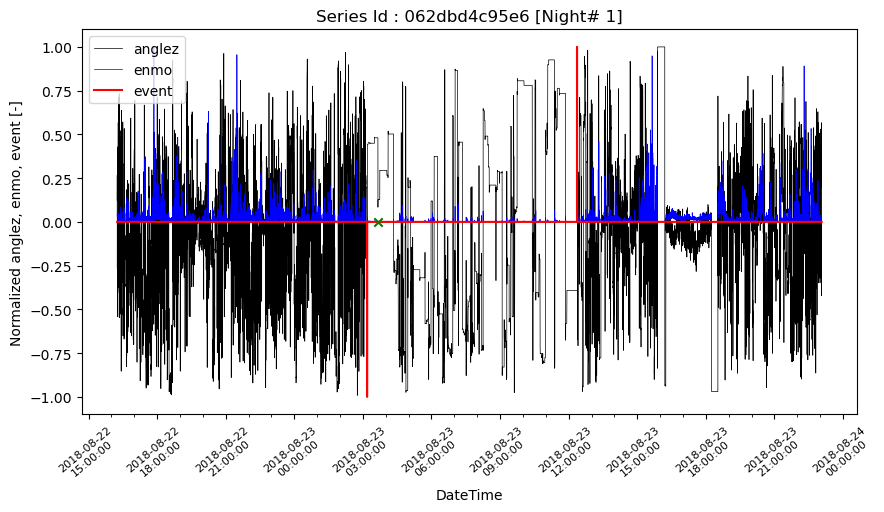

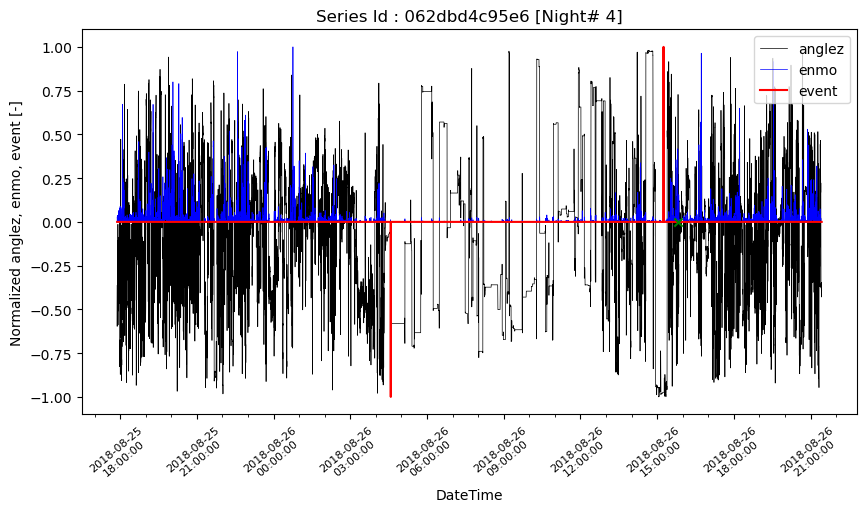

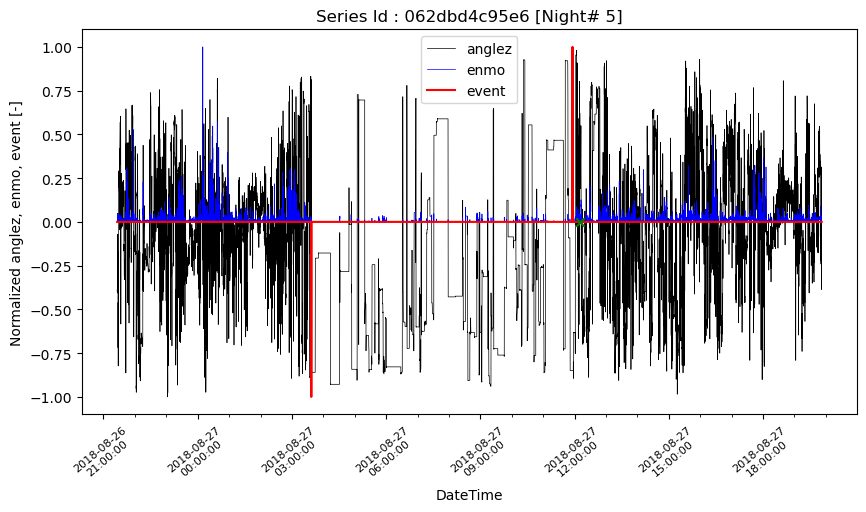

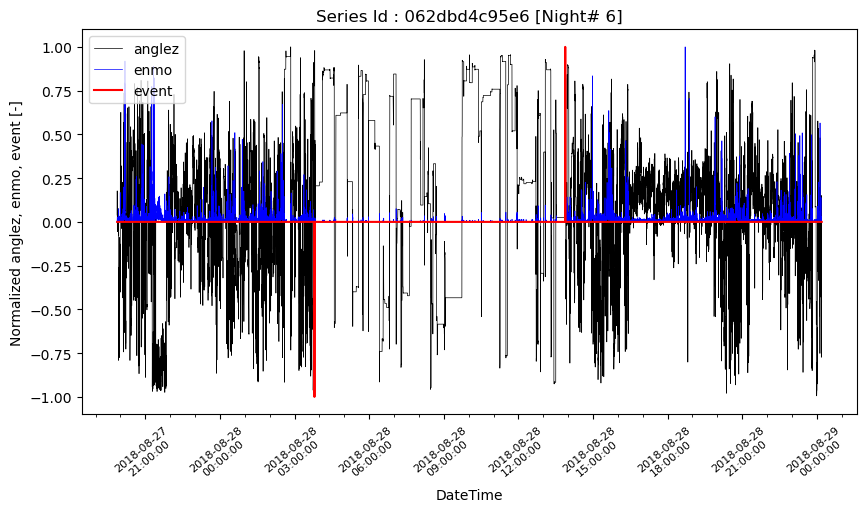

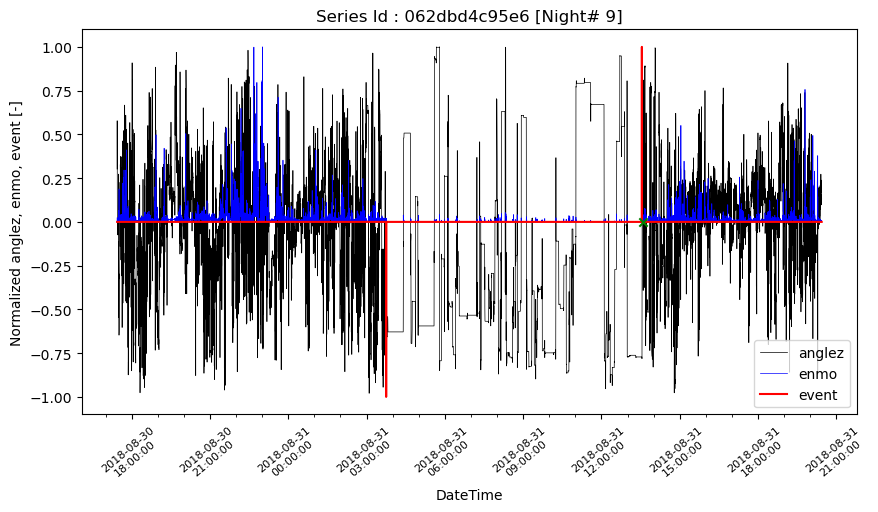

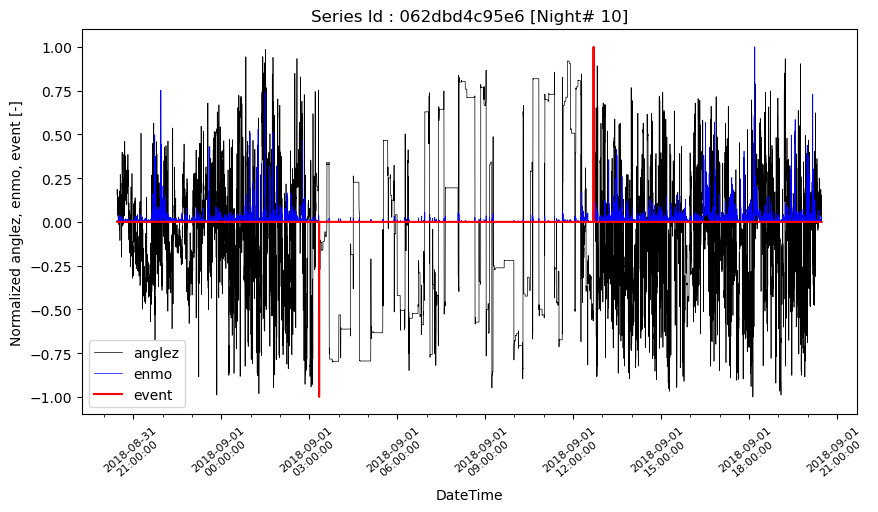

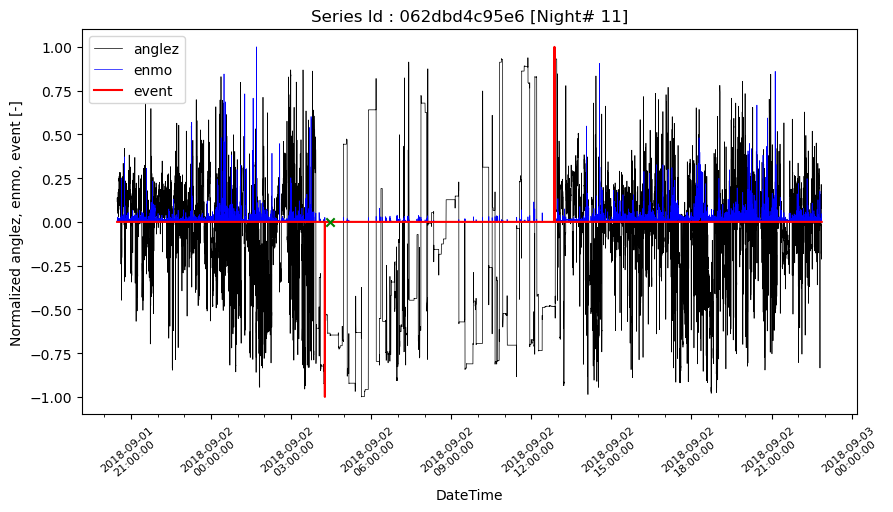

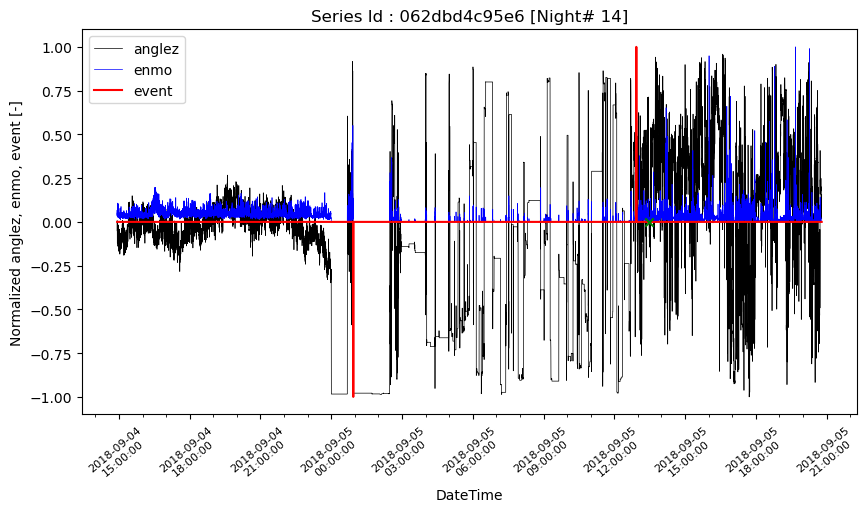

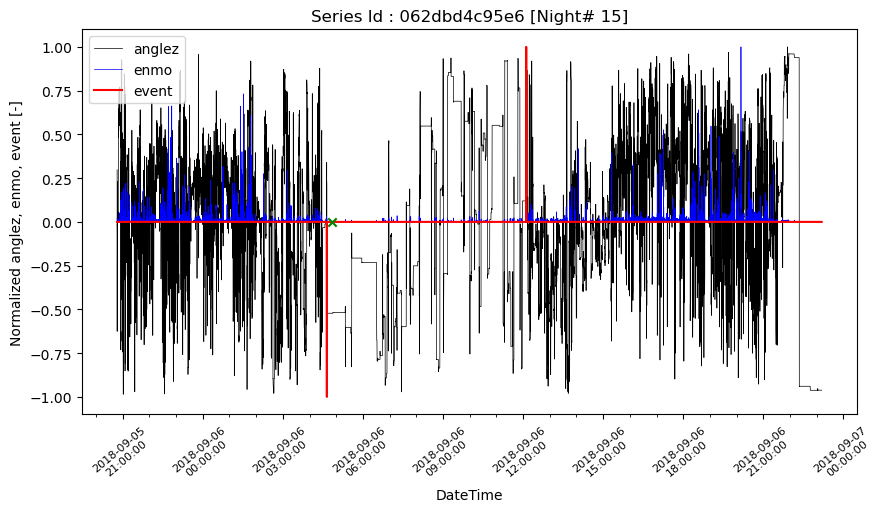

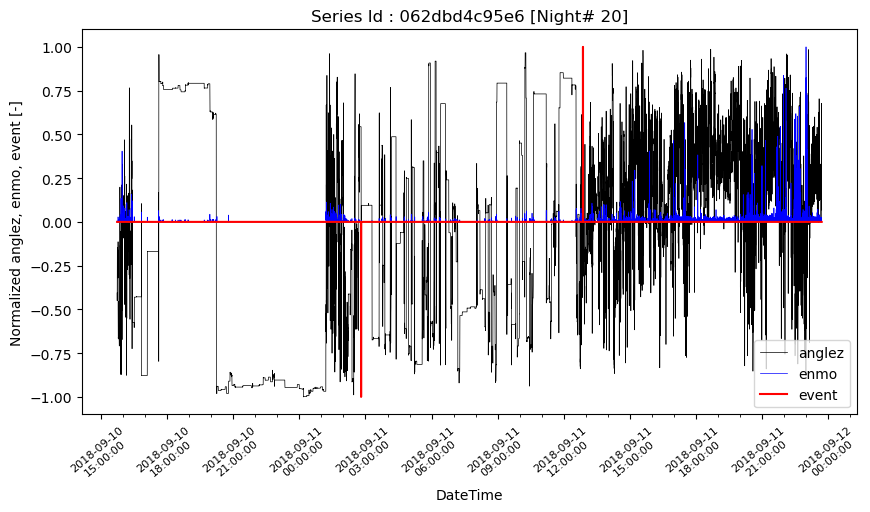

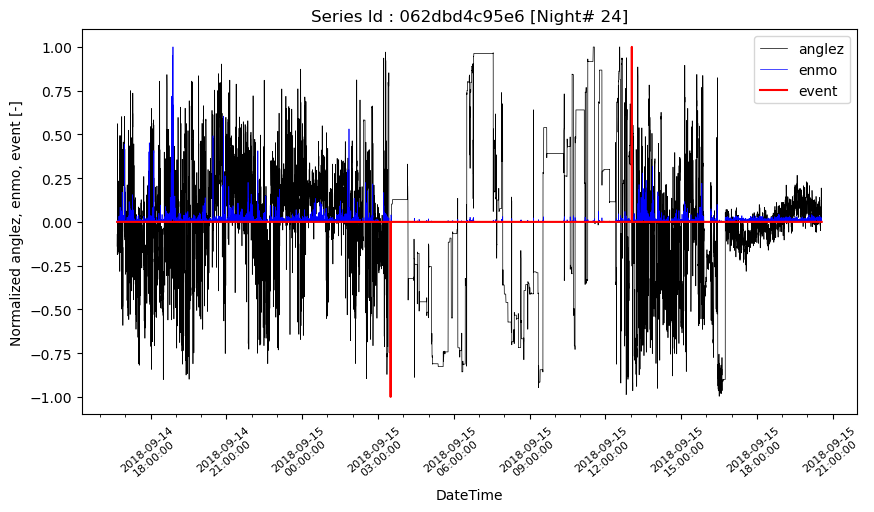

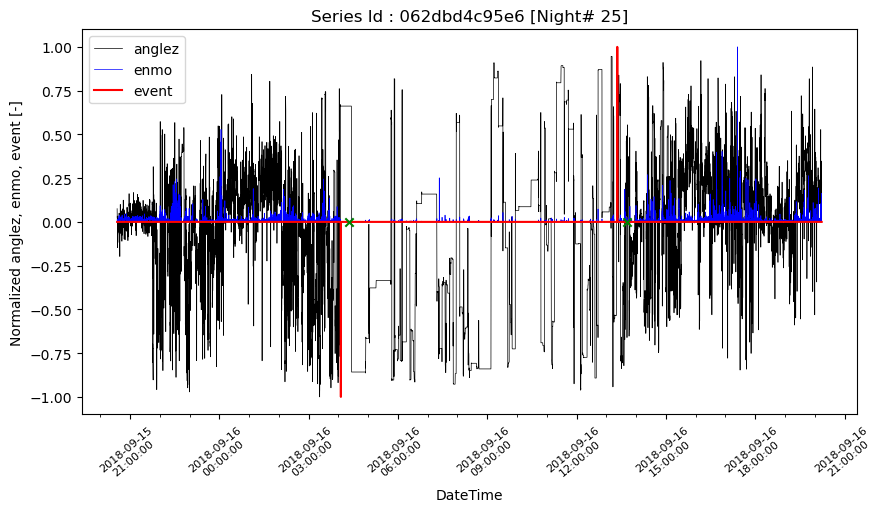

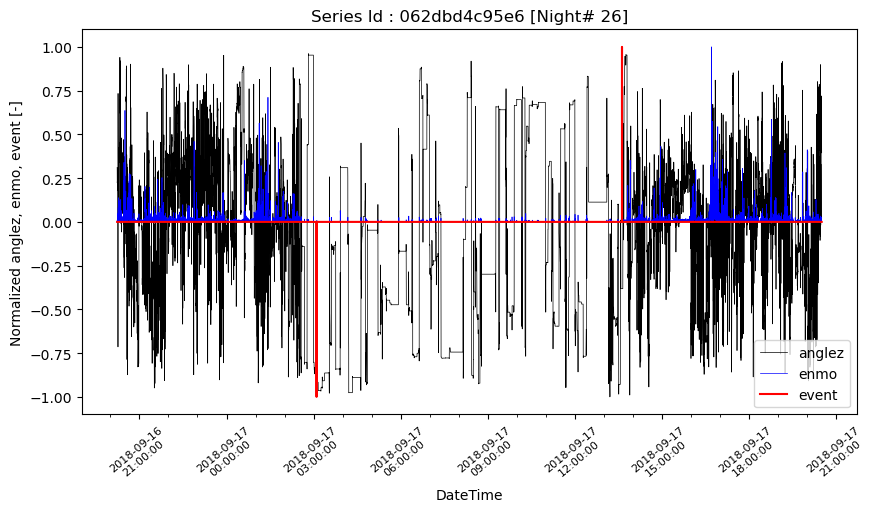

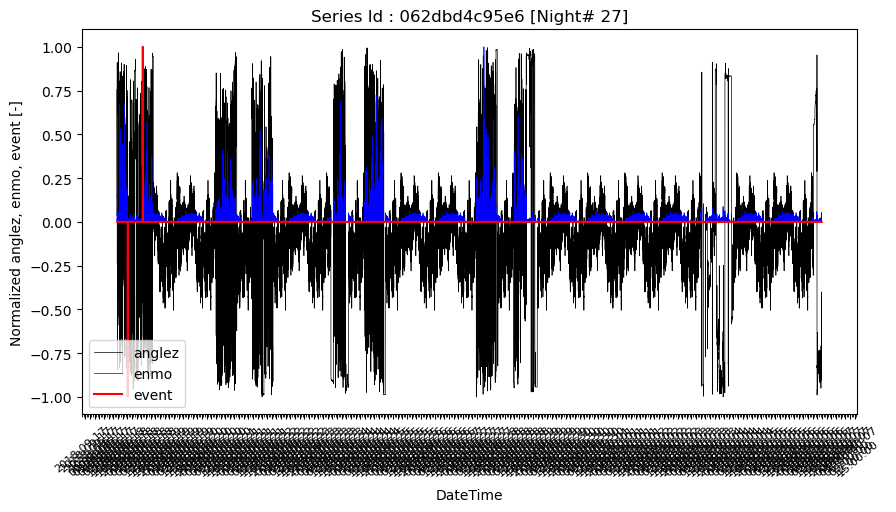

In [17]:
# Modifying the code to ensure that points from filtered_df are plotted on the top layer

for i in set(df2['night']):
    df22 = df2[df2['night'] == i]
    df22['anglez'] /= max(abs(max(df22['anglez'])), abs(min(df22['anglez'])))
    df22['enmo'] /= max(abs(max(df22['enmo'])), abs(min(df22['enmo'])))
    df22['event'] /= max(abs(max(df22['event'])), abs(min(df22['event'])), 1e-10)

    if df22['event'].max() == 1:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Plotting data from df22
        ax.plot(df22['date_time'], df22['anglez'], color='k', linewidth=0.5, label="anglez")
        ax.plot(df22['date_time'], df22['enmo'], color='b', linewidth=0.5, label="enmo")
        ax.plot(df22['date_time'], df22['event'], color='r', label="event")

        # Filtering filtered_df for the current night
        filtered_df_night = filtered_df[filtered_df['night'] == i]

        # Integrating events from filtered_df based on night
        for _, row in filtered_df_night.iterrows():
            # Find the closest time point in df22 to the current time in filtered_df
            closest_time = df22['date_time'].iloc[(np.abs(df22['date_time'] - row['date_time'])).argmin()]
            closest_event = df22[df22['date_time'] == closest_time]['event'].iloc[0]
    
            ax.scatter(closest_time, closest_event, color='g', marker='x', zorder=3)  # Using zorder to bring points to top

        # Setting up the plot
        ax.legend()
        ax.set_title('Series Id : ' + '062dbd4c95e6' + ' [Night# ' + str(int(i)) + ']')
        ax.set_xlabel('DateTime')
        ax.set_ylabel('Normalized anglez, enmo, event [-]')
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
        ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S"))
        plt.xticks(rotation=40, fontsize=8)

        plt.show()



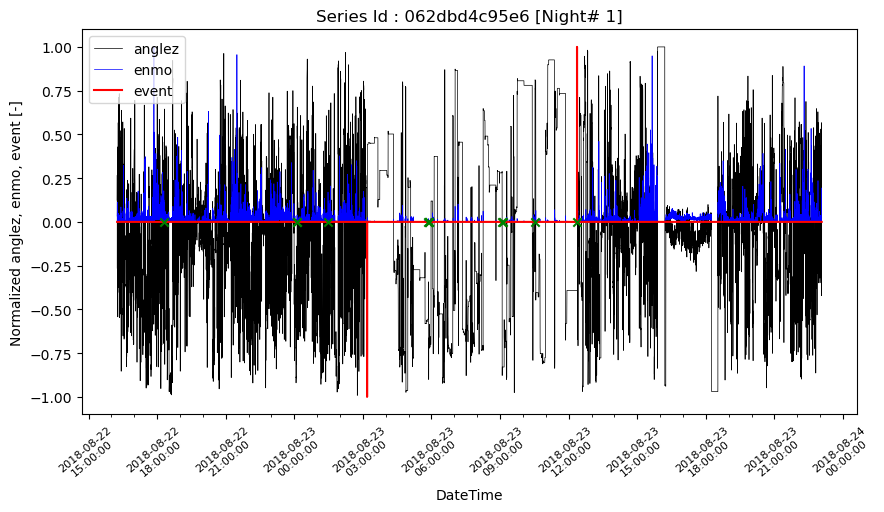

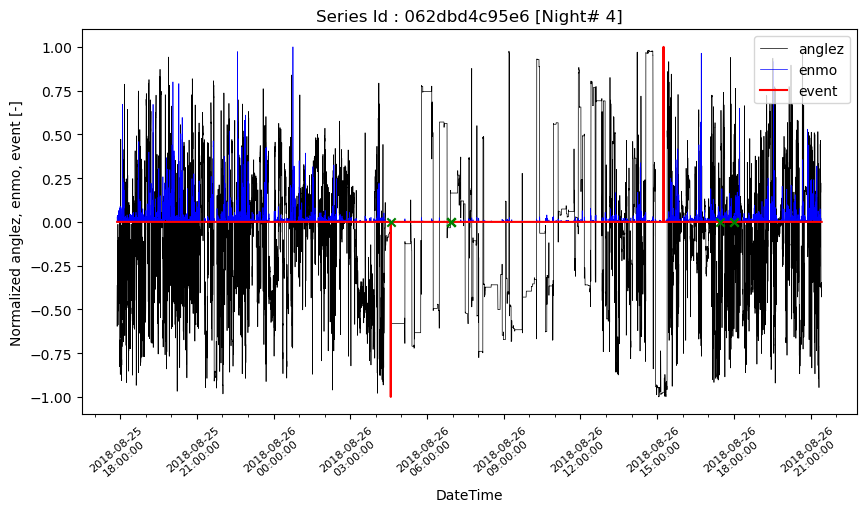

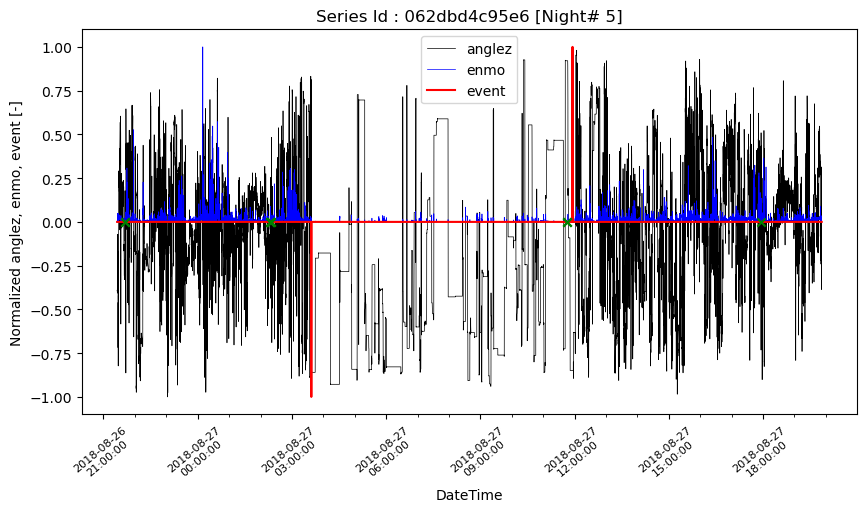

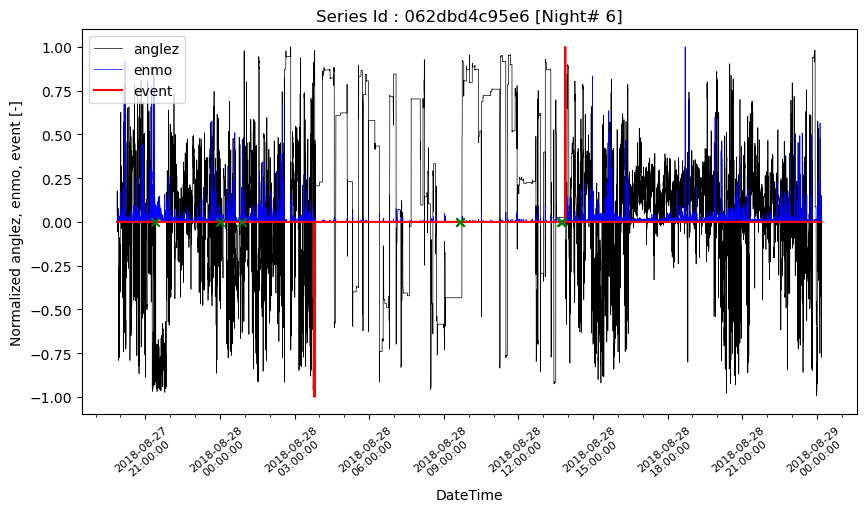

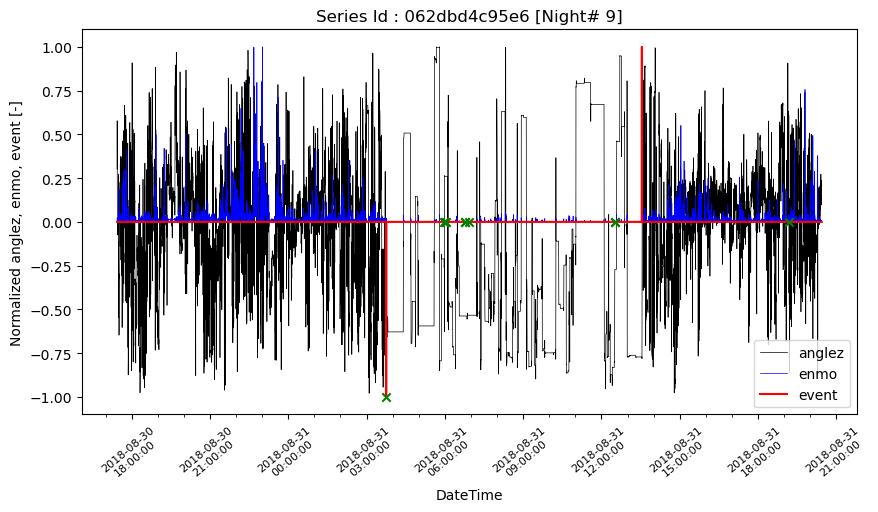

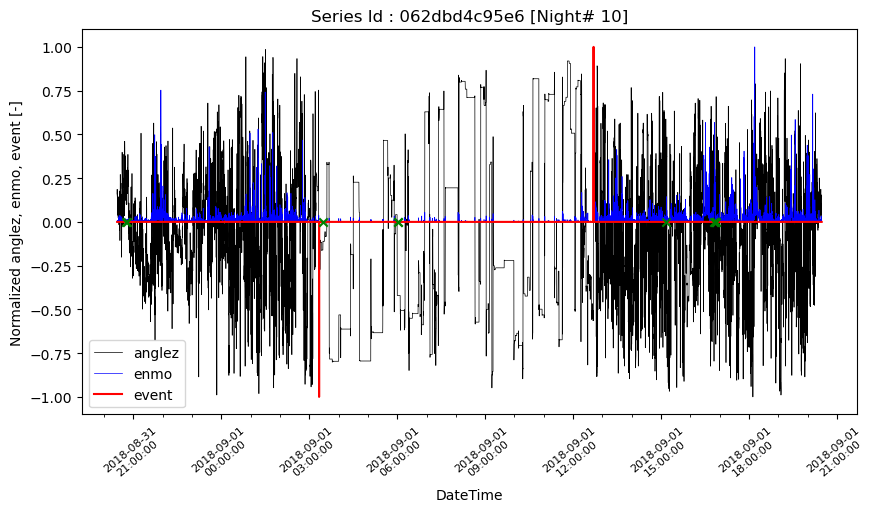

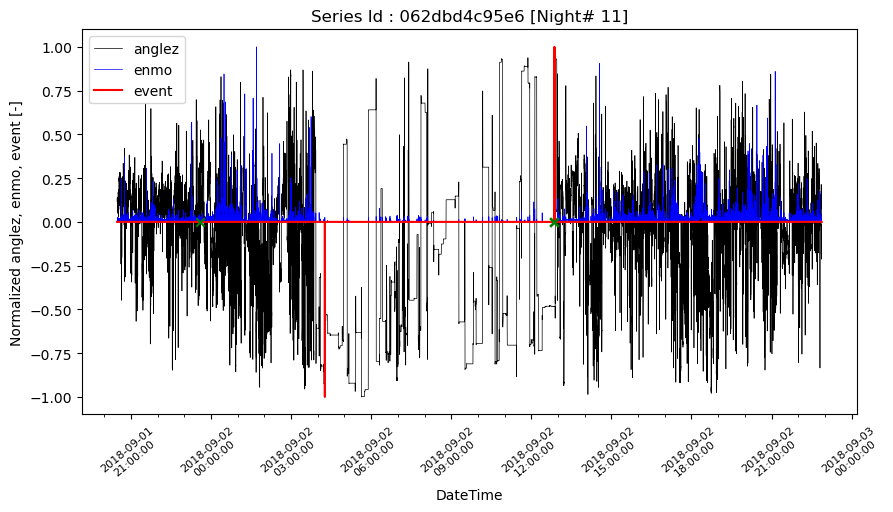

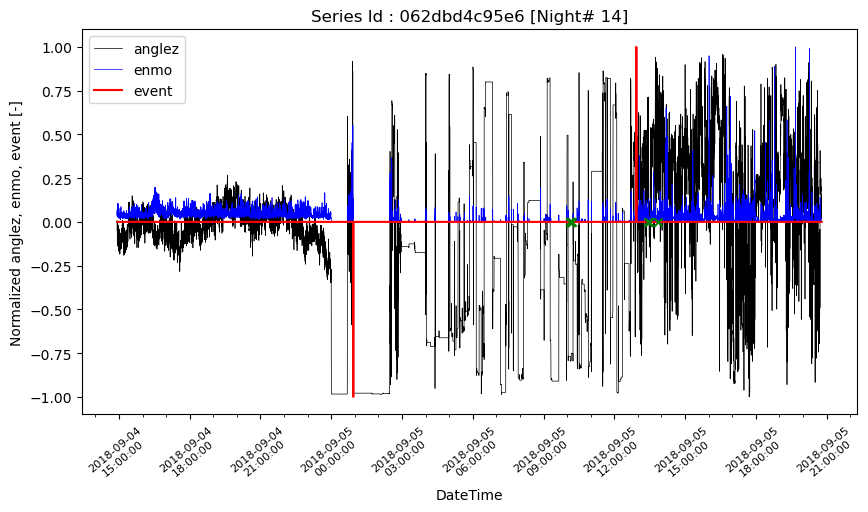

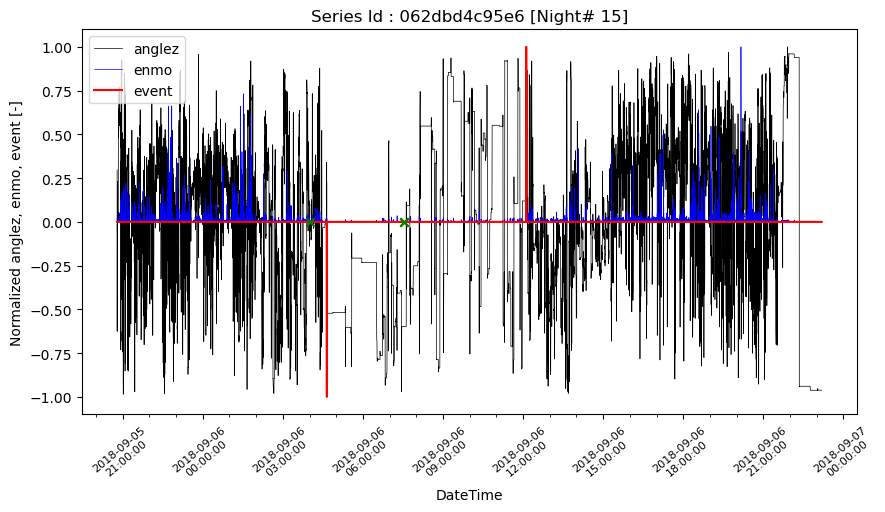

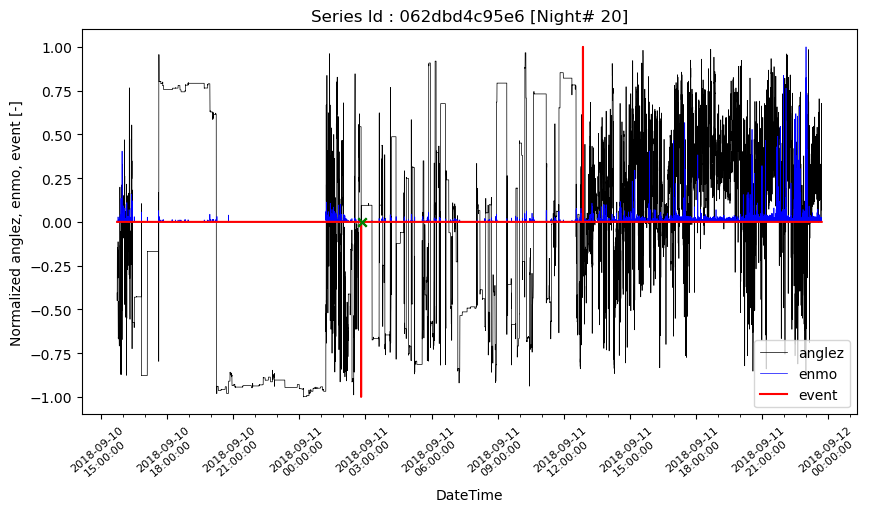

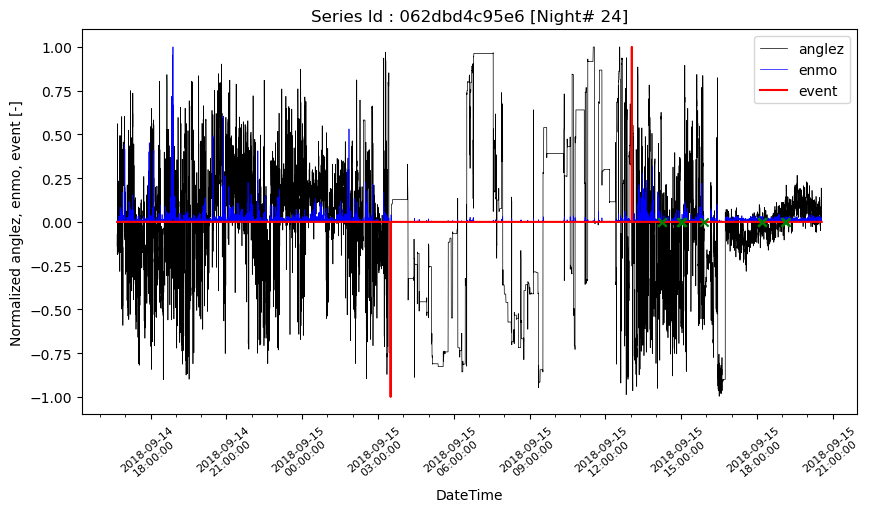

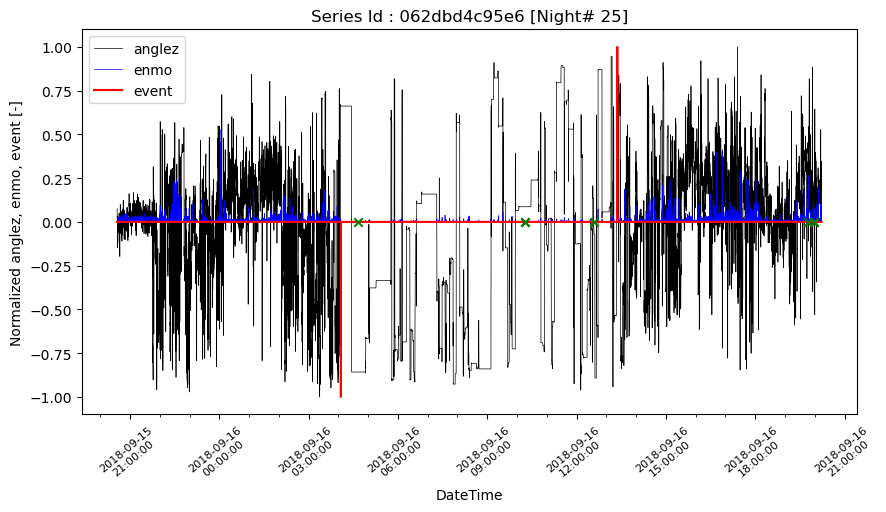

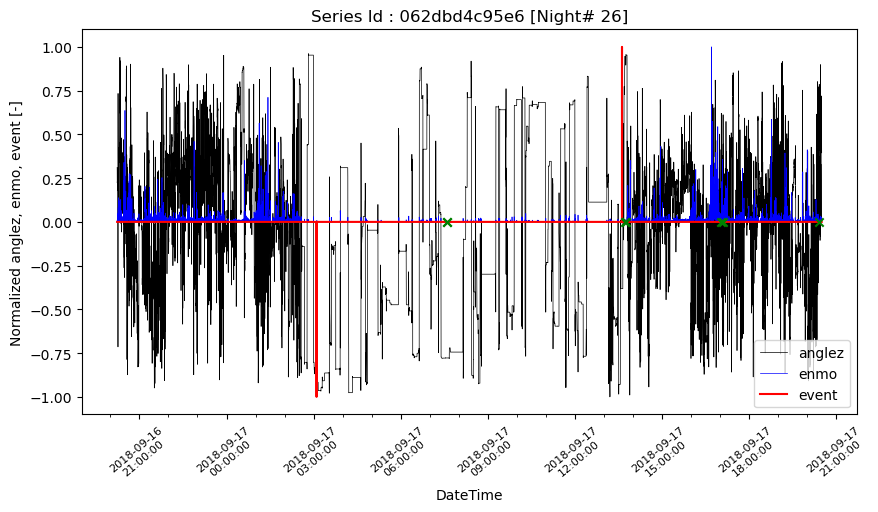

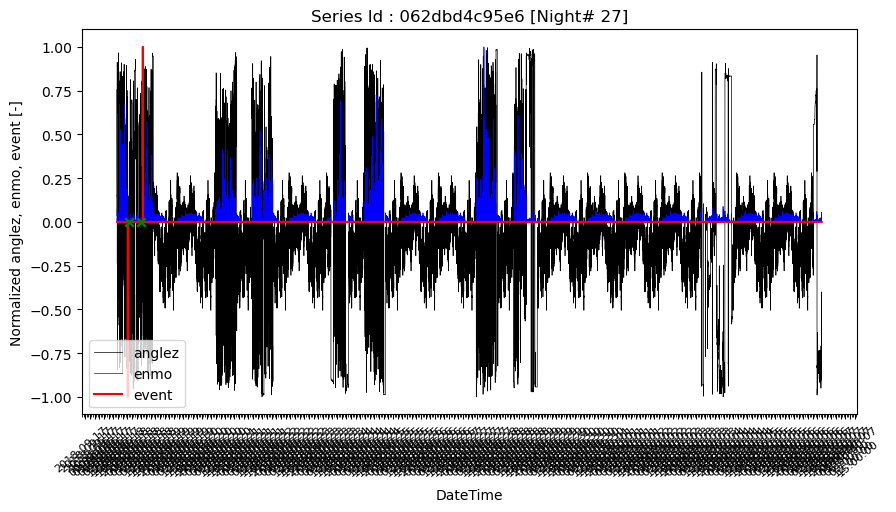

In [18]:
# Modifying the code to ensure that points from filtered_df are plotted on the top layer

for i in set(df2['night']):
    df22 = df2[df2['night'] == i]
    df22['anglez'] /= max(abs(max(df22['anglez'])), abs(min(df22['anglez'])))
    df22['enmo'] /= max(abs(max(df22['enmo'])), abs(min(df22['enmo'])))
    df22['event'] /= max(abs(max(df22['event'])), abs(min(df22['event'])), 1e-10)

    if df22['event'].max() == 1:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Plotting data from df22
        ax.plot(df22['date_time'], df22['anglez'], color='k', linewidth=0.5, label="anglez")
        ax.plot(df22['date_time'], df22['enmo'], color='b', linewidth=0.5, label="enmo")
        ax.plot(df22['date_time'], df22['event'], color='r', label="event")

        # Filtering filtered_df for the current night
        filtered_df_night = filtered_df2[filtered_df2['night'] == i]

        # Integrating events from filtered_df based on night
        for _, row in filtered_df_night.iterrows():
            # Find the closest time point in df22 to the current time in filtered_df
            closest_time = df22['date_time'].iloc[(np.abs(df22['date_time'] - row['date_time'])).argmin()]
            closest_event = df22[df22['date_time'] == closest_time]['event'].iloc[0]
    
            ax.scatter(closest_time, closest_event, color='g', marker='x', zorder=3)  # Using zorder to bring points to top

        # Setting up the plot
        ax.legend()
        ax.set_title('Series Id : ' + '062dbd4c95e6' + ' [Night# ' + str(int(i)) + ']')
        ax.set_xlabel('DateTime')
        ax.set_ylabel('Normalized anglez, enmo, event [-]')
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
        ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S"))
        plt.xticks(rotation=40, fontsize=8)

        plt.show()

In [ ]:
#filtered_df = df[df['series_id'].str.contains('062dbd4c95e6')]
filtered_df = data[data['series_id'].str.contains('062dbd4c95e6')]

In [20]:
df2

anglez    enmo                 date_time  night event
0       10.953900  0.0839 2018-08-22 16:15:00+00:00    1.0     0
1       16.707899  0.0862 2018-08-22 16:15:05+00:00    1.0     0
2       14.305600  0.0976 2018-08-22 16:15:10+00:00    1.0     0
3       23.613001  0.0934 2018-08-22 16:15:15+00:00    1.0     0
4       14.443400  0.1048 2018-08-22 16:15:20+00:00    1.0     0
...           ...     ...                       ...    ...   ...
778675 -80.813599  0.0000 2018-10-06 17:44:35+00:00   27.0     0
778676 -80.813599  0.0000 2018-10-06 17:44:40+00:00   27.0     0
778677 -80.813599  0.0000 2018-10-06 17:44:45+00:00   27.0     0
778678 -80.813599  0.0000 2018-10-06 17:44:50+00:00   27.0     0
778679 -80.813599  0.0000 2018-10-06 17:44:55+00:00   27.0     0

[778680 rows x 5 columns]

In [ ]:
Data = pd.read_csv(r"C:\Users\liuha\Desktop\Course\IE7275\Project\child-mind-institute-detect-sleep-states\train_events.csv")
Data

In [ ]:
Dataf = Data[Data['series_id'].str.contains('062dbd4c95e6')]
Dataf

In [45]:
df2

anglez    enmo                 date_time  night event
0       10.953900  0.0839 2018-08-22 16:15:00+00:00    1.0     0
1       16.707899  0.0862 2018-08-22 16:15:05+00:00    1.0     0
2       14.305600  0.0976 2018-08-22 16:15:10+00:00    1.0     0
3       23.613001  0.0934 2018-08-22 16:15:15+00:00    1.0     0
4       14.443400  0.1048 2018-08-22 16:15:20+00:00    1.0     0
...           ...     ...                       ...    ...   ...
778675 -80.813599  0.0000 2018-10-06 17:44:35+00:00   27.0     0
778676 -80.813599  0.0000 2018-10-06 17:44:40+00:00   27.0     0
778677 -80.813599  0.0000 2018-10-06 17:44:45+00:00   27.0     0
778678 -80.813599  0.0000 2018-10-06 17:44:50+00:00   27.0     0
778679 -80.813599  0.0000 2018-10-06 17:44:55+00:00   27.0     0

[778680 rows x 5 columns]

In [ ]:

# 假设Data2和Dataf是您的两组数据
# Data2 = pd.DataFrame([...])  # 第一组数据
# Dataf = pd.DataFrame([...])  # 第二组数据

# 转换timestamp列为datetime类型
df2['date_time'] = pd.to_datetime(df2['date_time'])
Dataf['timestamp'] = pd.to_datetime(Dataf['timestamp'], errors='coerce')

# 初始化状态列为0
df2['state'] = 0

# 上一个有效的wakeup时间
last_valid_wakeup = None

# 遍历Dataf的每个night
for night in sorted(Dataf['night'].unique()):
    night_data = Dataf[Dataf['night'] == night]
    onset_time = night_data[night_data['event'] == 'onset']['timestamp'].iloc[0]
    wakeup_time = night_data[night_data['event'] == 'wakeup']['timestamp'].iloc[0]

    # 如果当前night的onset为NaN并且有有效的wakeup时间
    if pd.isnull(onset_time) and last_valid_wakeup is not None:
        # 找到下一个有效的onset时间
        next_night_data = Dataf[(Dataf['night'] > night) & (Dataf['event'] == 'onset') & pd.notnull(Dataf['timestamp'])]
        next_valid_onset_time = next_night_data['timestamp'].iloc[0] if not next_night_data.empty else None

        # 删除从上一个有效的wakeup到下一个有效onset之间的数据
        if next_valid_onset_time:
            df2 = df2.drop(df2[(df22['timestamp'] > last_valid_wakeup) & (df22['timestamp'] < next_valid_onset_time)].index)

    # 更新last_valid_wakeup时间
    if pd.notnull(wakeup_time):
        last_valid_wakeup = wakeup_time

# 检查最后一个wakeup是否无效
last_night_data = Dataf[Dataf['night'] == Dataf['night'].max()]
last_onset_time = last_night_data[last_night_data['event'] == 'onset']['timestamp'].iloc[0]
last_wakeup_time = last_night_data[last_night_data['event'] == 'wakeup']['timestamp'].iloc[0]
if pd.isnull(last_wakeup_time) and last_valid_wakeup is not None:
    # 如果最后一个wakeup无效，则删除从上一个有效的wakeup之后的所有数据
    Data2 = Data2[Data2['timestamp'] <= last_valid_wakeup]

# 第二步：将onset到wakeup的数据state标记为1
for _, row in Dataf.iterrows():
    event = row['event']
    event_time = row['timestamp']

    if event == 'onset' and pd.notnull(event_time):
        # 查找对应的wakeup时间
        wakeup_time = Dataf[(Dataf['night'] == row['night']) & (Dataf['event'] == 'wakeup')]['timestamp'].iloc[0]
        if pd.notnull(wakeup_time):
            # 更新state为1
            Data2.loc[(Data2['timestamp'] >= event_time) & (Data2['timestamp'] <= wakeup_time), 'state'] = 1

# 最终的数据集
Data2



In [ ]:

# 假设Data2和Dataf是您的两组数据
# Data2 = pd.DataFrame([...])  # 第一组数据
# Dataf = pd.DataFrame([...])  # 第二组数据

# 转换timestamp列为datetime类型
Data2['timestamp'] = pd.to_datetime(Data2['timestamp'])
Dataf['timestamp'] = pd.to_datetime(Dataf['timestamp'], errors='coerce')

# 初始化状态列为0
Data2['state'] = 0

# 上一个有效的wakeup时间
last_valid_wakeup = None

# 遍历Dataf的每个night
for night in sorted(Dataf['night'].unique()):
    night_data = Dataf[Dataf['night'] == night]
    onset_time = night_data[night_data['event'] == 'onset']['timestamp'].iloc[0]
    wakeup_time = night_data[night_data['event'] == 'wakeup']['timestamp'].iloc[0]

    # 如果当前night的onset为NaN并且有有效的wakeup时间
    if pd.isnull(onset_time) and last_valid_wakeup is not None:
        # 找到下一个有效的onset时间
        next_night_data = Dataf[(Dataf['night'] > night) & (Dataf['event'] == 'onset') & pd.notnull(Dataf['timestamp'])]
        next_valid_onset_time = next_night_data['timestamp'].iloc[0] if not next_night_data.empty else None

        # 删除从上一个有效的wakeup到下一个有效onset之间的数据
        if next_valid_onset_time:
            Data2 = Data2.drop(Data2[(Data2['timestamp'] > last_valid_wakeup) & (Data2['timestamp'] < next_valid_onset_time)].index)

    # 更新last_valid_wakeup时间
    if pd.notnull(wakeup_time):
        last_valid_wakeup = wakeup_time

# 检查最后一个wakeup是否无效
last_night_data = Dataf[Dataf['night'] == Dataf['night'].max()]
last_onset_time = last_night_data[last_night_data['event'] == 'onset']['timestamp'].iloc[0]
last_wakeup_time = last_night_data[last_night_data['event'] == 'wakeup']['timestamp'].iloc[0]
if pd.isnull(last_wakeup_time) and last_valid_wakeup is not None:
    # 如果最后一个wakeup无效，则删除从上一个有效的wakeup之后的所有数据
    Data2 = Data2[Data2['timestamp'] <= last_valid_wakeup]

# 第二步：将onset到wakeup的数据state标记为1
for _, row in Dataf.iterrows():
    event = row['event']
    event_time = row['timestamp']

    if event == 'onset' and pd.notnull(event_time):
        # 查找对应的wakeup时间
        wakeup_time = Dataf[(Dataf['night'] == row['night']) & (Dataf['event'] == 'wakeup')]['timestamp'].iloc[0]
        if pd.notnull(wakeup_time):
            # 更新state为1
            Data2.loc[(Data2['timestamp'] >= event_time) & (Data2['timestamp'] <= wakeup_time), 'state'] = 1

# 最终的数据集
Data2


In [44]:
import pandas as pd

# 假设 Data2 和 Dataf 已经定义，并且有 'timestamp' 列
Data2['timestamp'] = pd.to_datetime(Data2['timestamp'])
Dataf['timestamp'] = pd.to_datetime(Dataf['timestamp'], errors='coerce')

# 初始化 Data2 中的 'state' 和 'night' 列
Data2['state'] = 0
Data2['night'] = None  # 用 None 初始化表示没有夜间数据

# 遍历 Dataf 中的每个唯一夜晚
for night in sorted(Dataf['night'].unique()):
    night_data = Dataf[Dataf['night'] == night]
    onset_time = night_data[night_data['event'] == 'onset']['timestamp'].iloc[0]
    wakeup_time = night_data[night_data['event'] == 'wakeup']['timestamp'].iloc[0]

    # 更新 Data2 中的 'state' 和 'night'
    if pd.notnull(onset_time) and pd.notnull(wakeup_time):
        Data2.loc[(Data2['timestamp'] >= onset_time) & (Data2['timestamp'] <= wakeup_time), 'state'] = 1
        Data2.loc[(Data2['timestamp'] >= onset_time) & (Data2['timestamp'] <= wakeup_time), 'night'] = night
    else:
        # 如果 onset 或 wakeup 是 NaN，只更新 'night' 而不更新 'state'
        if pd.notnull(onset_time):
            Data2.loc[Data2['timestamp'] >= onset_time, 'night'] = night
        if pd.notnull(wakeup_time):
            Data2.loc[Data2['timestamp'] <= wakeup_time, 'night'] = night

# 现在 Data2 将基于 Dataf 中的 'onset' 和 'wakeup' 时间更新 'state' 和 'night'


# Now Data2 will have 'state' and 'night' columns updated based on Dataf
Data2

series_id    step                 timestamp     anglez    enmo  \
2992140  062dbd4c95e6       0 2018-08-22 12:15:00-04:00  10.953900  0.0839   
2992141  062dbd4c95e6       1 2018-08-22 12:15:05-04:00  16.707899  0.0862   
2992142  062dbd4c95e6       2 2018-08-22 12:15:10-04:00  14.305600  0.0976   
2992143  062dbd4c95e6       3 2018-08-22 12:15:15-04:00  23.613001  0.0934   
2992144  062dbd4c95e6       4 2018-08-22 12:15:20-04:00  14.443400  0.1048   
...               ...     ...                       ...        ...     ...   
3456380  062dbd4c95e6  464240 2018-09-18 09:01:40-04:00  39.358398  0.0228   
3456381  062dbd4c95e6  464241 2018-09-18 09:01:45-04:00  39.316799  0.0000   
3456382  062dbd4c95e6  464242 2018-09-18 09:01:50-04:00  39.316799  0.0000   
3456383  062dbd4c95e6  464243 2018-09-18 09:01:55-04:00  39.316799  0.0000   
3456384  062dbd4c95e6  464244 2018-09-18 09:02:00-04:00  39.316799  0.0000   

         state night  
2992140      0  None  
2992141      0  None  
2992142      0  None  
2992143      0  None  
2992144      0  None  
...        ...   ...  
3456380      1    27  
3456381      1    27  
3456382      1    27  
3456383      1    27  
3456384      1    27  

[188154 rows x 7 columns]

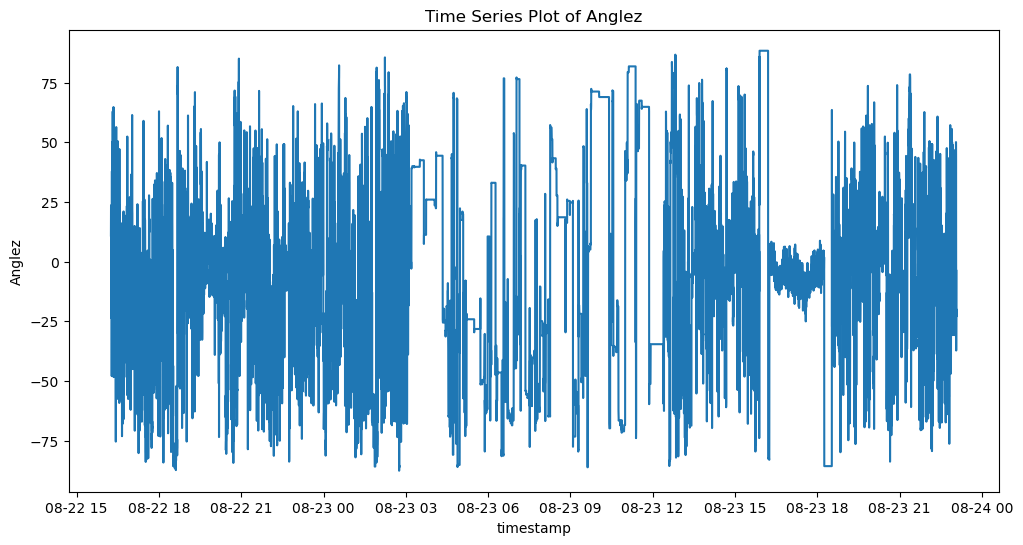

In [49]:
df2_night1 = df2[df2['night'] == 1]
plt.figure(figsize=(12, 6))
plt.plot(df2_night1['date_time'], df2_night1['anglez'])
plt.title('Time Series Plot of Anglez')
plt.xlabel('timestamp')
plt.ylabel('Anglez')
plt.show()

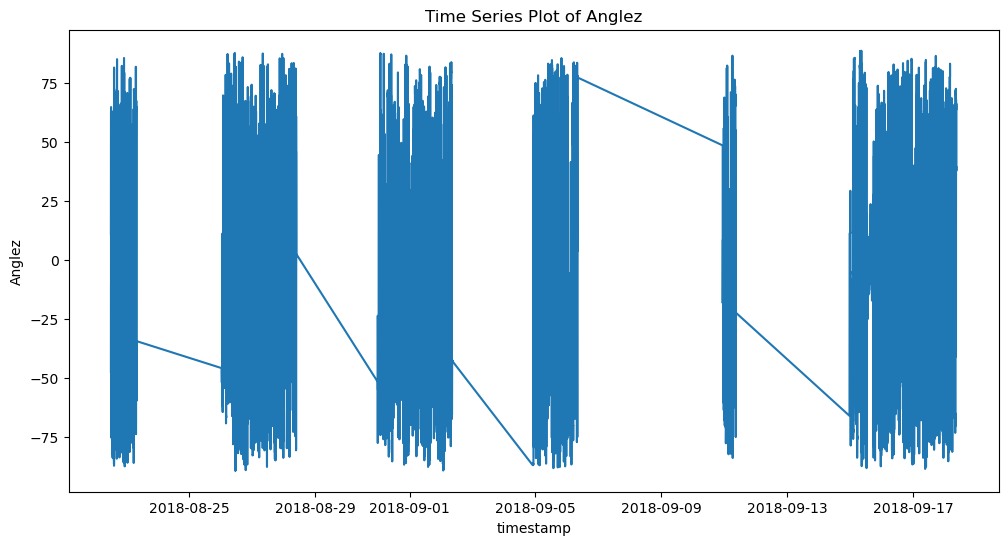

In [42]:
#Data2_night1 = Data2[Data2['night'] == 1]
plt.figure(figsize=(12, 6))
plt.plot(Data2['timestamp'], Data2['anglez'])
plt.title('Time Series Plot of Anglez')
plt.xlabel('timestamp')
plt.ylabel('Anglez')
plt.show()

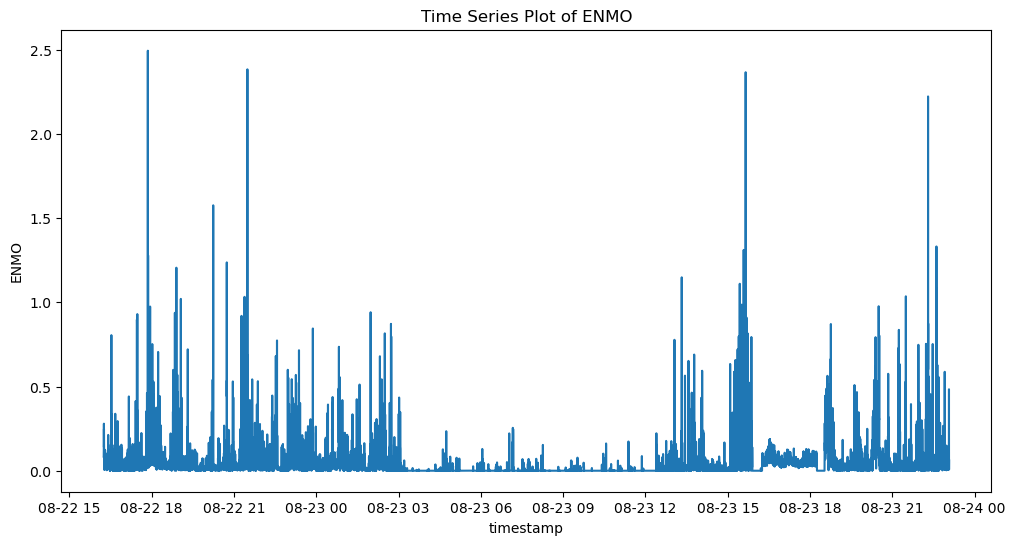

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df2_night1['date_time'], df2_night1['enmo'])
plt.title('Time Series Plot of ENMO')
plt.xlabel('timestamp')
plt.ylabel('ENMO')
plt.show()

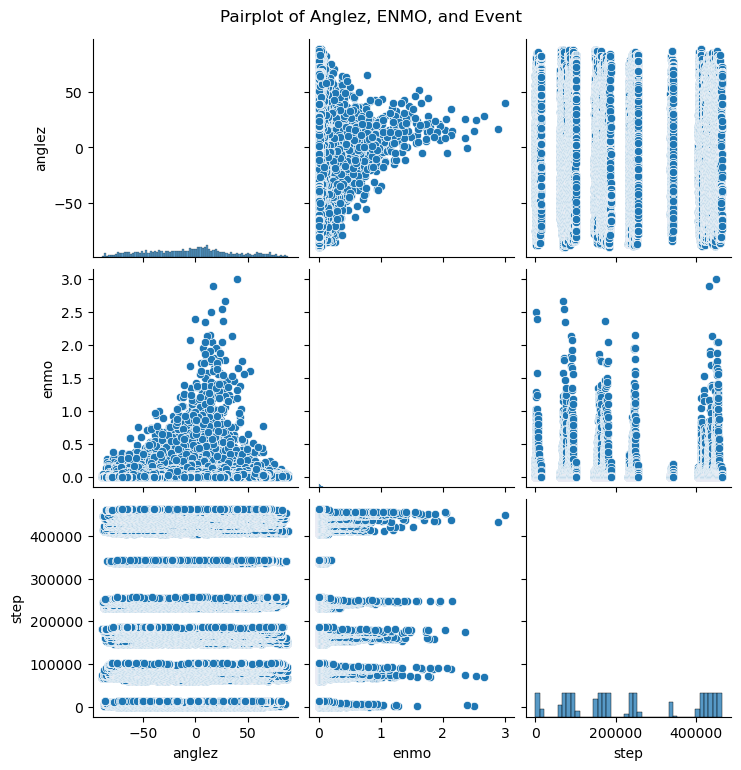

In [47]:
pairplot_data = Data2[['anglez', 'enmo','step']]

sns.pairplot(pairplot_data)
plt.suptitle('Pairplot of Anglez, ENMO, and Step', y=1.02)
plt.show()

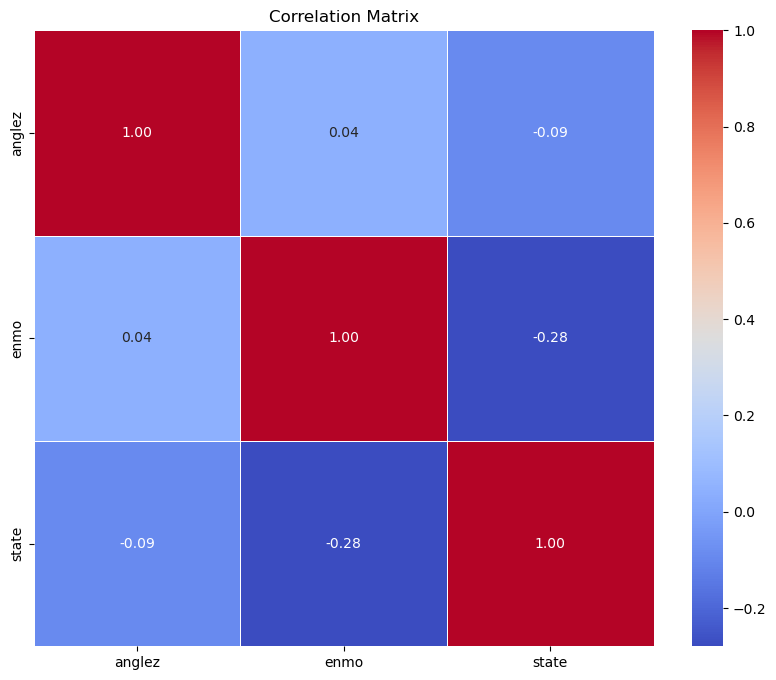

In [51]:
numerical_columns =  Data2[['anglez', 'enmo','state']]
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

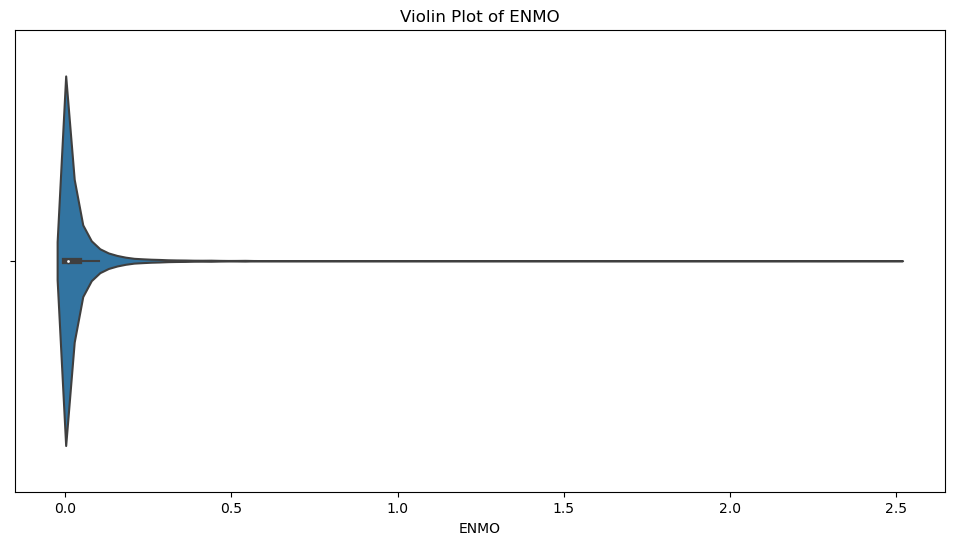

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

violin_enmo_data = df2_night1[['enmo']]
plt.figure(figsize=(12, 6))
sns.violinplot(x=violin_enmo_data['enmo'])

plt.title('Violin Plot of ENMO')
plt.xlabel('ENMO')
#plt.xlim([-0.2, 0.5])

plt.show()


In [37]:
Data = pd.read_csv(r"C:\Users\liuha\Desktop\Course\IE7275\Project\child-mind-institute-detect-sleep-states\train_events.csv")
Data

series_id  night   event      step                 timestamp
0      038441c925bb      1   onset    4992.0  2018-08-14T22:26:00-0400
1      038441c925bb      1  wakeup   10932.0  2018-08-15T06:41:00-0400
2      038441c925bb      2   onset   20244.0  2018-08-15T19:37:00-0400
3      038441c925bb      2  wakeup   27492.0  2018-08-16T05:41:00-0400
4      038441c925bb      3   onset   39996.0  2018-08-16T23:03:00-0400
...             ...    ...     ...       ...                       ...
14503  fe90110788d2     33  wakeup  560604.0  2017-09-06T04:07:00-0400
14504  fe90110788d2     34   onset  574620.0  2017-09-06T23:35:00-0400
14505  fe90110788d2     34  wakeup  581604.0  2017-09-07T09:17:00-0400
14506  fe90110788d2     35   onset       NaN                       NaN
14507  fe90110788d2     35  wakeup       NaN                       NaN

[14508 rows x 5 columns]

In [ ]:
Data1

In [38]:
Dataf = Data[Data['series_id'].str.contains('062dbd4c95e6')]
Dataf

series_id  night   event     step                 timestamp
310  062dbd4c95e6      1   onset   7872.0  2018-08-22T23:11:00-0400
311  062dbd4c95e6      1  wakeup  14484.0  2018-08-23T08:22:00-0400
312  062dbd4c95e6      2   onset      NaN                       NaN
313  062dbd4c95e6      2  wakeup      NaN                       NaN
314  062dbd4c95e6      3   onset      NaN                       NaN
..            ...    ...     ...      ...                       ...
393  062dbd4c95e6     42  wakeup      NaN                       NaN
394  062dbd4c95e6     43   onset      NaN                       NaN
395  062dbd4c95e6     43  wakeup      NaN                       NaN
396  062dbd4c95e6     44   onset      NaN                       NaN
397  062dbd4c95e6     44  wakeup      NaN                       NaN

[88 rows x 5 columns]

In [ ]:
Data_062dbd4c95e6 = data[data['series_id'].str.contains('062dbd4c95e6')]
Data2 = Data_062dbd4c95e6
Data2

In [ ]:
Data2 = Data_062dbd4c95e6
Data2

In [39]:


# 假设Data2和Dataf是您的两组数据
# Data2 = pd.DataFrame([...])  # 第一组数据
# Dataf = pd.DataFrame([...])  # 第二组数据

# 转换timestamp列为datetime类型
Data2['timestamp'] = pd.to_datetime(Data2['timestamp'])
Dataf['timestamp'] = pd.to_datetime(Dataf['timestamp'], errors='coerce')

# 初始化状态列为0
Data2['state'] = 0

# 上一个有效的wakeup时间
last_valid_wakeup = None

# 遍历Dataf的每个night
for night in sorted(Dataf['night'].unique()):
    night_data = Dataf[Dataf['night'] == night]
    onset_time = night_data[night_data['event'] == 'onset']['timestamp'].iloc[0]
    wakeup_time = night_data[night_data['event'] == 'wakeup']['timestamp'].iloc[0]

    # 如果当前night的onset为NaN并且有有效的wakeup时间
    if pd.isnull(onset_time) and last_valid_wakeup is not None:
        # 找到下一个有效的onset时间
        next_night_data = Dataf[(Dataf['night'] > night) & (Dataf['event'] == 'onset') & pd.notnull(Dataf['timestamp'])]
        next_valid_onset_time = next_night_data['timestamp'].iloc[0] if not next_night_data.empty else None

        # 删除从上一个有效的wakeup到下一个有效onset之间的数据
        if next_valid_onset_time:
            Data2 = Data2.drop(Data2[(Data2['timestamp'] > last_valid_wakeup) & (Data2['timestamp'] < next_valid_onset_time)].index)

    # 更新last_valid_wakeup时间
    if pd.notnull(wakeup_time):
        last_valid_wakeup = wakeup_time

# 检查最后一个wakeup是否无效
last_night_data = Dataf[Dataf['night'] == Dataf['night'].max()]
last_onset_time = last_night_data[last_night_data['event'] == 'onset']['timestamp'].iloc[0]
last_wakeup_time = last_night_data[last_night_data['event'] == 'wakeup']['timestamp'].iloc[0]
if pd.isnull(last_wakeup_time) and last_valid_wakeup is not None:
    # 如果最后一个wakeup无效，则删除从上一个有效的wakeup之后的所有数据
    Data2 = Data2[Data2['timestamp'] <= last_valid_wakeup]

# 第二步：将onset到wakeup的数据state标记为1
for _, row in Dataf.iterrows():
    event = row['event']
    event_time = row['timestamp']

    if event == 'onset' and pd.notnull(event_time):
        # 查找对应的wakeup时间
        wakeup_time = Dataf[(Dataf['night'] == row['night']) & (Dataf['event'] == 'wakeup')]['timestamp'].iloc[0]
        if pd.notnull(wakeup_time):
            # 更新state为1
            Data2.loc[(Data2['timestamp'] >= event_time) & (Data2['timestamp'] <= wakeup_time), 'state'] = 1

# 最终的数据集
Data2



series_id    step                 timestamp     anglez    enmo  \
2992140  062dbd4c95e6       0 2018-08-22 12:15:00-04:00  10.953900  0.0839   
2992141  062dbd4c95e6       1 2018-08-22 12:15:05-04:00  16.707899  0.0862   
2992142  062dbd4c95e6       2 2018-08-22 12:15:10-04:00  14.305600  0.0976   
2992143  062dbd4c95e6       3 2018-08-22 12:15:15-04:00  23.613001  0.0934   
2992144  062dbd4c95e6       4 2018-08-22 12:15:20-04:00  14.443400  0.1048   
...               ...     ...                       ...        ...     ...   
3456380  062dbd4c95e6  464240 2018-09-18 09:01:40-04:00  39.358398  0.0228   
3456381  062dbd4c95e6  464241 2018-09-18 09:01:45-04:00  39.316799  0.0000   
3456382  062dbd4c95e6  464242 2018-09-18 09:01:50-04:00  39.316799  0.0000   
3456383  062dbd4c95e6  464243 2018-09-18 09:01:55-04:00  39.316799  0.0000   
3456384  062dbd4c95e6  464244 2018-09-18 09:02:00-04:00  39.316799  0.0000   

         state  
2992140      0  
2992141      0  
2992142      0  
2992143      0  
2992144      0  
...        ...  
3456380      1  
3456381      1  
3456382      1  
3456383      1  
3456384      1  

[188154 rows x 6 columns]

In [ ]:
df2 = pd.merge(df, ev, on='date_time', how='outer')
#print(df2.copy().dropna(how='any'))   ### CHECK ###
df2 = df2.drop(['series_id_x','series_id_y','step_x','step_y'], axis=1)
df2['event'] = df2['event'].fillna(0)
df2['night'][0] = 1
df2['night'] = df2['night'].interpolate()
df2['night'] = round(df2['night'])
df2.loc[df2['event']=='onset','event'] = -1
df2.loc[df2['event']=='wakeup','event'] = 1
df2

In [ ]:
for i in set(df2['night']):
    df22 = df2[df2['night']==i]
    df22['anglez'] = df22['anglez'] / max(abs(max(df22['anglez'])),abs(min(df22['anglez'])))
    df22['enmo'] = df22['enmo'] / max(abs(max(df22['enmo'])),abs(min(df22['enmo'])))
    df22['event'] = df22['event'] / max(abs(max(df22['event'])),abs(min(df22['event'])),1e-10)
    if df22['event'].max() == 1:
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot()
        ax.plot(df22['date_time'], df22['anglez'], color='k', linewidth=0.5, label="anglez")
        ax.plot(df22['date_time'], df22['enmo'], color='b', linewidth=0.5, label="enmo")
        ax.plot(df22['date_time'], df22['event'], color='r', label="event")
        ax.legend()
        ax.set_title('Series Id : '+ID+' [Night# '+str(int(i))+']')
        ax.set_xlabel('DateTime')
        ax.set_ylabel('Normalized anglez, enmo, event [-]')
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
        ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S"))
        labels = ax.get_xticklabels()
        plt.setp(labels, rotation=40, fontsize=8)
        plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Data2['timestamp'], Data2['state'])
plt.title('Time Series Plot of state')
plt.xlabel('timestamp')
plt.ylabel('State')
plt.show()

In [ ]:
Data2['state'].value_counts()

In [ ]:
correlation_matrix = Data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#12-1分钟，60-5分钟，120-10分钟，360-半小时，720-1小时
def produce_feature(data):
    for window_size in [360]:
        # Precompute means for anglez
        anglez_mean = data['anglez'].rolling(window=window_size).mean()
        data[f'moving_average_anglez_{window_size}'] = anglez_mean
        data[f'variance_anglez_{window_size}'] = data['anglez'].rolling(window=window_size).var()
        # Optimized MSE calculation for anglez
        data[f'mse_anglez_{window_size}'] = ((data['anglez'] - anglez_mean) ** 2).rolling(window=window_size).mean()

        if 'enmo' in data.columns:
            # Precompute means for enmo
            enmo_mean = data['enmo'].rolling(window=window_size).mean()
            data[f'moving_average_enmo_{window_size}'] = enmo_mean
            data[f'variance_enmo_{window_size}'] = data['enmo'].rolling(window=window_size).var()
            # Optimized MSE calculation for enmo
            data[f'mse_enmo_{window_size}'] = ((data['enmo'] - enmo_mean) ** 2).rolling(window=window_size).mean()
    return data

In [ ]:
Data2_4 = produce_feature(Data2)

In [ ]:
correlation_matrix = Data2_5.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
Data2_4

In [ ]:
Data2_5  = Data2_4 .drop(['series_id', 'timestamp','step','state'],axis=1)
Data2_5 =Data2_5.dropna()


In [ ]:
X = Data2_5 
pca = PCA(n_components = 8)

X_pca = pca.fit_transform(X)
print("components: \n",pca.components_)

explained_variance = pca.explained_variance_ratio_
print("\n variance:\n",explained_variance)
loadings = pd.DataFrame(pca.components_.T, columns=['PC' + str(i+1) for i in range(8)], index=X.columns)

# 对于每个主成分，找出最大载荷的特征
most_important_feature_per_pc = loadings.abs().idxmax()

print(most_important_feature_per_pc)

In [ ]:
X

In [ ]:
df4 = pd.DataFrame(Data2_4)

# 转换 timestamp 列为字符串
df4['timestamp'] = df4['timestamp'].astype(str)

# 显示结果
print(df4['timestamp'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 假设 data 是您的完整数据集，包含特征和目标变量
# 特征数据
#X = data[['anglez', 'enmo', 'moving_average_anglez_360', 'variance_anglez_360', 'mse_anglez_360', 'moving_average_enmo_360', 'variance_enmo_360', 'mse_enmo_360']]
# 目标变量（标签）

X = Data2_4[['step','anglez', 'enmo', 'moving_average_anglez_360', 'variance_anglez_360', 'mse_anglez_360', 'moving_average_enmo_360', 'variance_enmo_360', 'mse_enmo_360']]

y = Data2_4['state']  # 确保这里的 'target' 是您数据集中的目标变量列名

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% 训练和 30% 测试

# 创建决策树模型
clf = DecisionTreeClassifier()

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集结果
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 y_pred 是模型在测试集上的预测结果
# y_test 是测试集的真实标签

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 打印混淆矩阵
print("Confusion Matrix:\n", cm)


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# 假设 clf 是您的模型，X_test 是测试集
# 获取预测概率
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # 获取正类的预测概率

# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 计算 AUC
roc_auc = auc(fpr, tpr)
print('roc_auc:',roc_auc)
# 或者 roc_auc = roc_auc_score(y_test, y_pred_proba)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
X_test['predicted_state'] = y_pred

# 按 step 对测试集进行分组，并计算每个 step 的平均预测状态
step_avg_pred = X_test.groupby('step')['predicted_state'].mean().reset_index()



# 绘制 step 与平均预测状态的关系
plt.figure(figsize=(10, 6))
plt.plot(step_avg_pred['step'], step_avg_pred['predicted_state'], marker='o')
plt.xlabel('Step')
plt.ylabel('Average Predicted State')
plt.title('Average Predicted State over Steps')
plt.grid(True)
plt.show()



In [ ]:

# Adding y=0.5 to each point in prediction_beast and printing the results
prediction_beast = [83456, 68812, 8204, 153605, 250991, 239932, 430150, 423436, 181584]
y_value = 0.5

# Creating a list of tuples with each element of prediction_beast and y=0.5
prediction_beast_with_y = [(x, y_value) for x in prediction_beast]

# Printing the results
prediction_beast_with_y


In [ ]:
# 绘制 step 与平均预测状态的关系，并将给定的数据以红色×标记

# Creating a new figure for the plot
plt.figure(figsize=(10, 6))

# Plotting the average predicted state over steps
plt.plot(step_avg_pred['step'], step_avg_pred['predicted_state'], marker='o', label='Average Predicted State')
plt.xlabel('Step')
plt.ylabel('Average Predicted State')
plt.title('Average Predicted State over Steps')
plt.grid(True)

# Plotting the given data points as red x's
for x, y in prediction_beast_with_y:
    plt.scatter(x, y, color='red', marker='x', label='Prediction Beast' if x == prediction_beast_with_y[0][0] else "")

# Adding a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Plotting the data points with connecting lines and then marking the prediction_beast steps on the x-axis

plt.figure(figsize=(10, 6))

# Plotting the average predicted state over steps with connecting lines
plt.plot(step_avg_pred['step'], step_avg_pred['predicted_state'], marker='o')
plt.xlabel('Step')
plt.ylabel('Average Predicted State')
plt.title('Average Predicted State over First Quarter of Steps')
plt.grid(True)

# Plotting the prediction_beast points as red x's
for x, y in prediction_beast_with_y:
    if x <= max_step / 4:
        plt.scatter(x, y, color='red', marker='x')

# Adjusting the x-axis limit to show only the first quarter
plt.xlim([step_avg_pred['step'].min(), max_step / 40])

# Adding red text for each step in prediction_beast on the x-axis
for x in prediction_beast:
    if x <= max_step / 4:
        plt.text(x, plt.ylim()[0], str(x), color='red', ha='center', va='top')

# Show the plot
plt.show()


In [ ]:
Data2_5 = Data2_4[['step', 'state']]
Data2_5

In [ ]:
Data2_5['state_change'] = Data2_5['state'].diff().fillna(0)

# Identifying the points where there is a change in state
state_change_points_Data2_5 = Data2_5[Data2_5['state_change'] != 0]

# Printing the state change points from Data2_5
state_change_points_Data2_5

In [ ]:
# Recalculating state change points for Data2_5
Data2_5['state_change'] = Data2_5['state'].diff().fillna(0)
state_change_points_Data2_5 = Data2_5[Data2_5['state_change'] != 0]

# Creating a new plot
plt.figure(figsize=(10, 6))

# Plotting the Data2_5 data
plt.scatter(Data2_5['step'], Data2_5['state'], color='green', marker='o', label='Data2_5')

# Highlighting the points where the state changes in Data2_5
plt.scatter(state_change_points_Data2_5['step'], state_change_points_Data2_5['state'], color='blue', marker='x', label='State Change Points')

# Determining the new x-axis range for Data2_5
new_max_x_Data2_5 = Data2_5['step'].max() / 40

# Plotting the prediction_beast points as red circles and adding their x-coordinates as text on the x-axis
for x, y in prediction_beast_with_y:
    if x <= new_max_x_Data2_5:
        plt.scatter(x, y, color='red', marker='o', label='Prediction Beast' if x == prediction_beast_with_y[0][0] else "")
        plt.text(x, plt.ylim()[0], str(x), color='red', ha='center', va='top')

# Adding x-coordinates of state change points of Data2_5 on the x-axis
for x in state_change_points_Data2_5['step']:
    if x <= new_max_x_Data2_5:
        plt.text(x, plt.ylim()[0], str(x), color='blue', ha='center', va='top')

# Adding plot details
plt.xlabel('Step')
plt.ylabel('State')
plt.title('Data2_5 with State Change Points and Prediction Beast')
plt.grid(True)
plt.legend()

# Adjusting the x-axis limit to 1/40th of the original max step for Data2_5
plt.xlim([Data2_5['step'].min(), new_max_x_Data2_5])

# Show the plot
plt.show()

# Printing the state change points from Data2_5
state_change_points_Data2_5



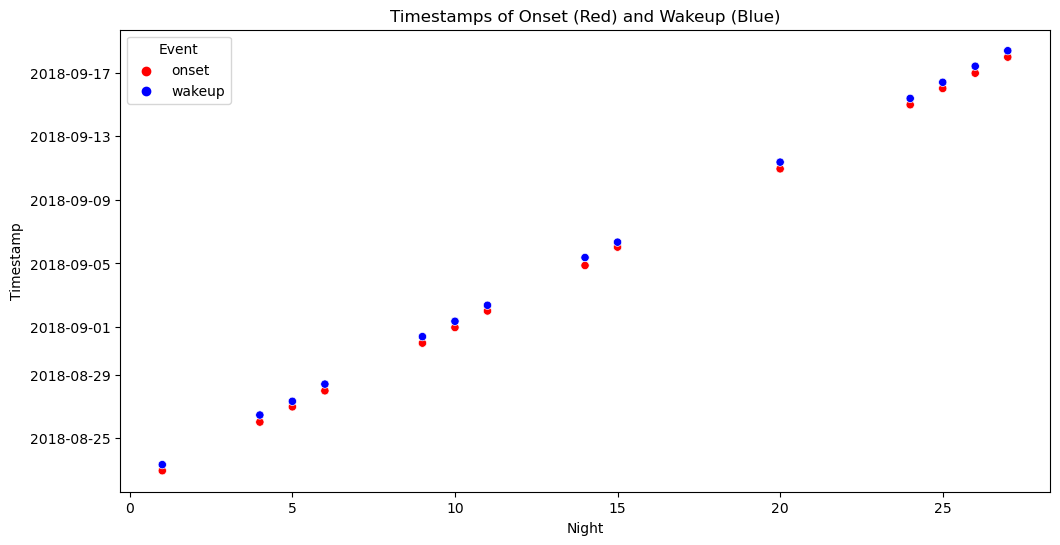

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 你提供的数据


# 创建 DataFrame
Dataf = pd.DataFrame(Dataf)

# 将 timestamp 转换为 datetime 对象
Dataf['timestamp'] = pd.to_datetime(Dataf['timestamp'], errors='coerce')

# 准备新的 DataFrame 以存储每个事件的时间
event_times = pd.DataFrame()

# 遍历每个 night 并添加 onset 和 wakeup 的时间
for night in Dataf['night'].unique():
    night_data = Dataf[Dataf['night'] == night]
    for event in ['onset', 'wakeup']:
        if event in night_data['event'].values:
            event_time = night_data[night_data['event'] == event]['timestamp'].iloc[0]
            if pd.notnull(event_time):
                event_times = event_times.append({'Night': night, 'Timestamp': event_time, 'Event': event}, ignore_index=True)

# 绘制图表
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Night', y='Timestamp', hue='Event', data=event_times, palette={'onset': 'red', 'wakeup': 'blue'})
plt.title('Timestamps of Onset (Red) and Wakeup (Blue)')
plt.xlabel('Night')
plt.ylabel('Timestamp')
plt.legend(title='Event')
plt.show()


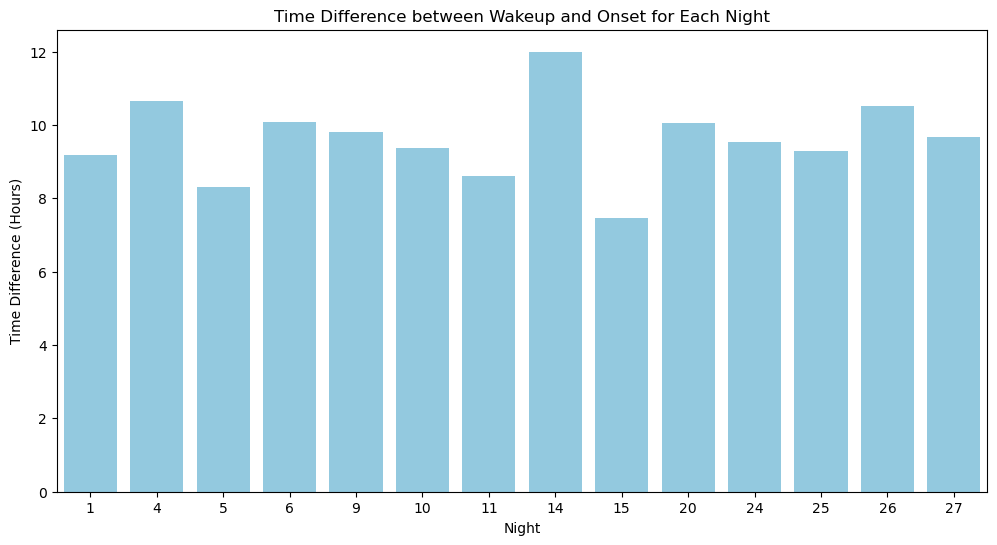

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 你提供的数据
data = {...}  # 将你的数据放在这里

# 创建 DataFrame
Dataf  = pd.DataFrame(Dataf )

# 将 timestamp 转换为 datetime 对象
Dataf['timestamp'] = pd.to_datetime(Dataf['timestamp'], errors='coerce')

# 准备新的 DataFrame 以存储每个夜晚的时间差
time_diffs = pd.DataFrame()

# 计算每个夜晚的 onset 和 wakeup 时间差
for night in Dataf['night'].unique():
    night_data = Dataf[Dataf['night'] == night]
    if 'onset' in night_data['event'].values and 'wakeup' in night_data['event'].values:
        onset_time = night_data[night_data['event'] == 'onset']['timestamp'].iloc[0]
        wakeup_time = night_data[night_data['event'] == 'wakeup']['timestamp'].iloc[0]
        if pd.notnull(onset_time) and pd.notnull(wakeup_time):
            time_diff = wakeup_time - onset_time
            time_diffs = time_diffs.append({'Night': night, 'TimeDiff': time_diff}, ignore_index=True)

# 将时间差转换为更合适的格式（如小时）
time_diffs['TimeDiff'] = time_diffs['TimeDiff'].dt.total_seconds() / 3600

# 绘制图表
plt.figure(figsize=(12, 6))
sns.barplot(x='Night', y='TimeDiff', data=time_diffs, color='skyblue')
plt.title('Time Difference between Wakeup and Onset for Each Night')
plt.xlabel('Night')
plt.ylabel('Time Difference (Hours)')
plt.show()
